# Experiments for IROS 2018 Late Breaking Results
---

In [1]:
# import the modules
import os
import GPy
import pickle
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import sklearn.metrics as metrics
from matplotlib import rc, rcParams
from matplotlib import pyplot as plt

%matplotlib inline

 /home/dl-box/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88


In [2]:
# import utility functions
from plotFuncs import *
from modelFuncs import *

In [3]:
# sns properties
sns.set_style("white")
rc('font', weight='bold', size=30)
sns.set_context("paper", font_scale=2.0, rc={"lines.linewidth": 2.0})

## Dataset Preprocessing
---

Preprocess and save pickle file

In [8]:
# setup variables for loading dataset
nPostures = 6
nSamples = 100
dataPath = 'Dataset/Raw/'

In [9]:
# load dataset into one dictionary
JAData = {}
JDData = {}
indices = {'JA':list(range(7))+list(range(8,14)), 'JT':list(range(1,7))+list(range(8,14))}

for posture in range(1,nPostures+1):        
        jaF = pd.read_csv('%sCDP%dJA' % (dataPath,posture))
        jvF = pd.read_csv('%sCDP%dJT' % (dataPath,posture))        
        
        jaDat = jaF.values[:,indices['JA']]
        jvDat = jvF.values[:,indices['JT']]
        sampleInds = np.linspace(0, jaDat.shape[0]-1, num=nSamples, dtype=np.int)

        JAData[posture] = jaDat[sampleInds,:]
        JDData[posture] = np.hstack((jaDat[sampleInds,:],jvDat[sampleInds,:]))

# inspect the dictionary
print(JAData.keys())
print(JDData[1].shape)

# dump the dictionary to pickle
pickle.dump(JAData, open('Dataset/JA.p','wb'))
pickle.dump(JDData, open('Dataset/JD.p','wb'))

dict_keys([1, 2, 3, 4, 5, 6])
(100, 25)


## Model Comparison
---

In [10]:
# load dataset
JAData = pickle.load(open('Dataset/JA.p','rb'))
JDData = pickle.load(open('Dataset/JD.p','rb'))

In [17]:
# create the required folders for 
# storing trained models and results
if not os.path.exists('Models'):
    os.mkdir('Models')

if not os.path.exists('Results'):
    os.mkdir('Results')
    
if not os.path.exists('Results/JA'):
    os.mkdir('Results/JD')
    os.mkdir('Results/JA')
    
if not os.path.exists('Results/JA/Images'):
    os.mkdir('Results/JD/Images')
    os.mkdir('Results/JA/Images')

JA 12
pca: 0.026833, 0.031911


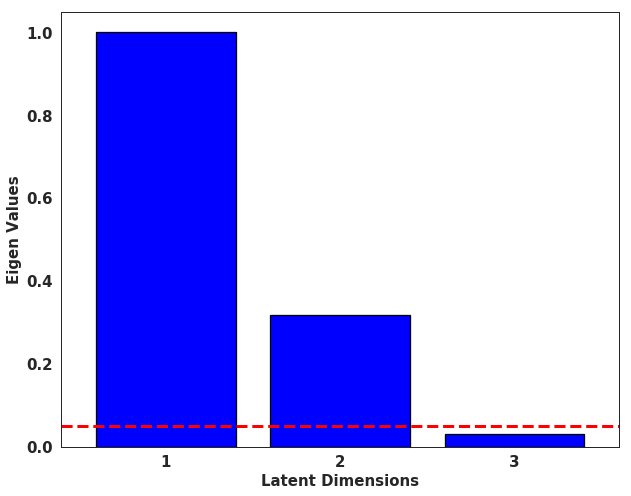

0 1


<Figure size 432x288 with 0 Axes>

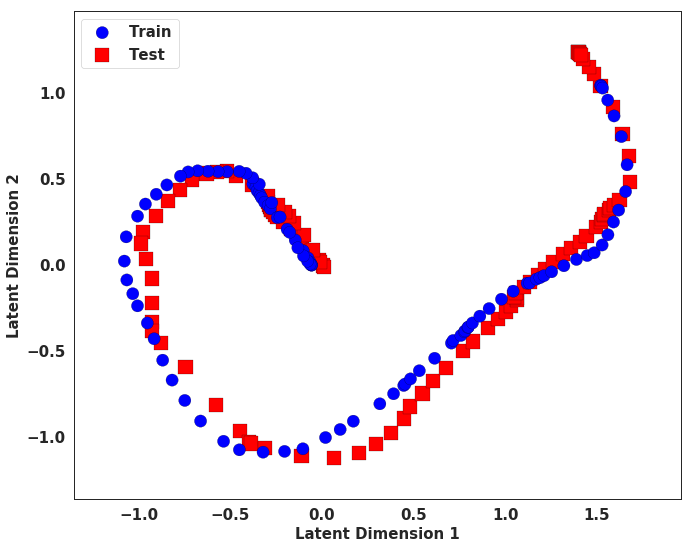

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i    f              |g|        
    00s10  02  -7.649984e+03   5.382720e+03 
    00s14  03  -7.714807e+03   2.960623e+03 

 /home/dl-box/miniconda3/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


    00s19  04  -7.775087e+03   1.702235e+03 
    03s09  52  -7.922286e+03   2.504727e+01 
Runtime:     03s09
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    00s18  002  -1.076791e+04   7.844159e+06 
    03s29  056  -2.524388e+04   2.078068e+07 
    10s43  189  -2.744198e+04   6.037447e+07 
    24s05  502  -2.931385e+04   6.537792e+06 
Runtime:     24s05
Optimization status: Maximum number of f evaluations reached

....................................................................................................
....................................................................................................
gplvm: 0.024667, 0.036162


<Figure size 432x288 with 0 Axes>

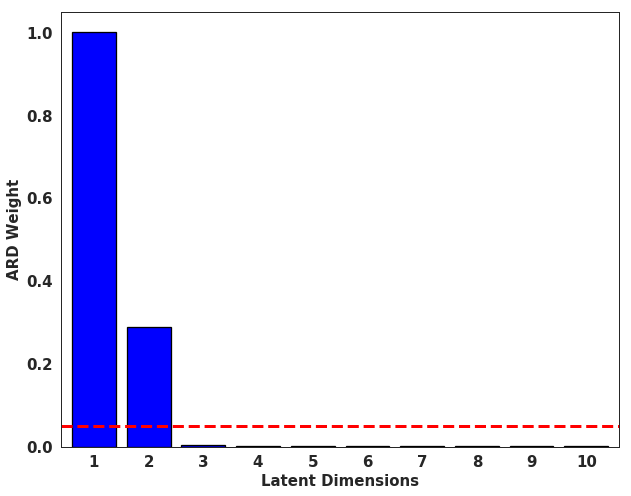

1 0


<Figure size 432x288 with 0 Axes>

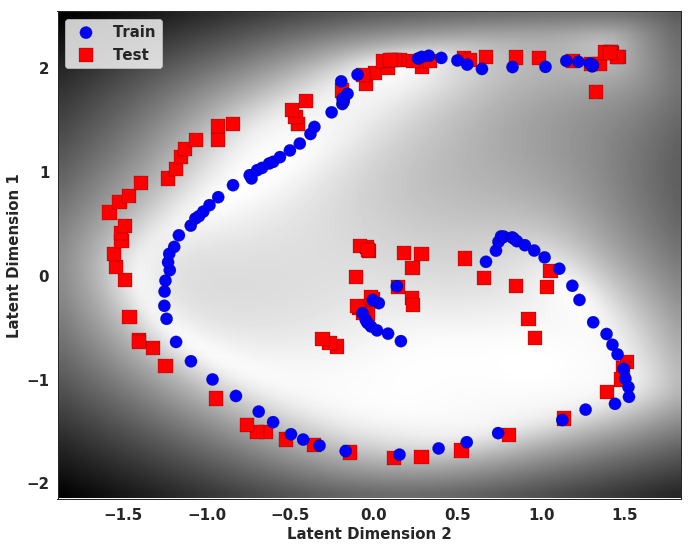

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i    f              |g|        
    00s13  02   4.362314e+05   5.262584e+09 
    01s21  16   1.003054e+03   1.472965e+04 
    03s26  41  -4.822949e+03   1.366348e+03 
    04s08  52  -4.995199e+03   2.060518e+02 
Runtime:     04s08
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    00s19  002  -6.305351e+03   1.932300e+05 
    02s27  030  -8.109138e+03   1.466535e+04 
    08s47  125  -1.014780e+04   1.338601e+04 
    23s96  374  -1.119953e+04   5.941893e+04 
    32s63  502  -1.154665e+04   2.060230e+04 
Runtime:     32s63
Optimization status: Maximum number of f evaluations reached

....................................................................................................
....................................................................................................
bgplvm: 0.014929, 0.019956


<Figure size 432x288 with 0 Axes>

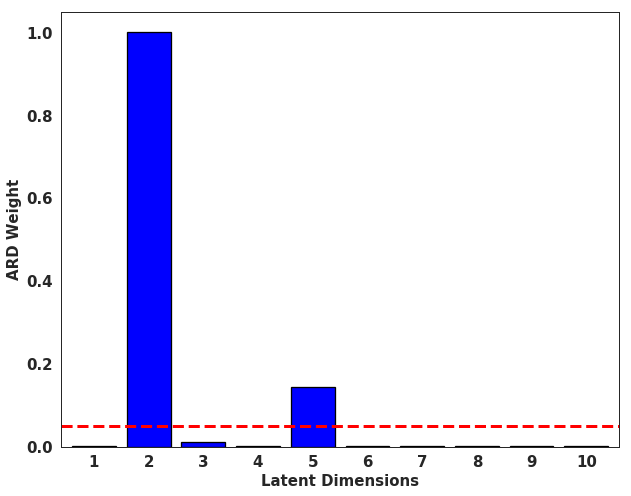

4 1


<Figure size 432x288 with 0 Axes>

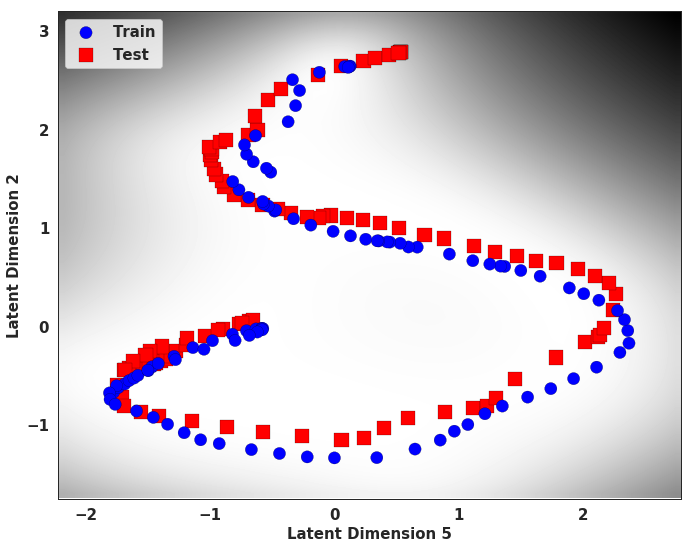

JD 24
pca: 0.057117, 0.083480


<Figure size 432x288 with 0 Axes>

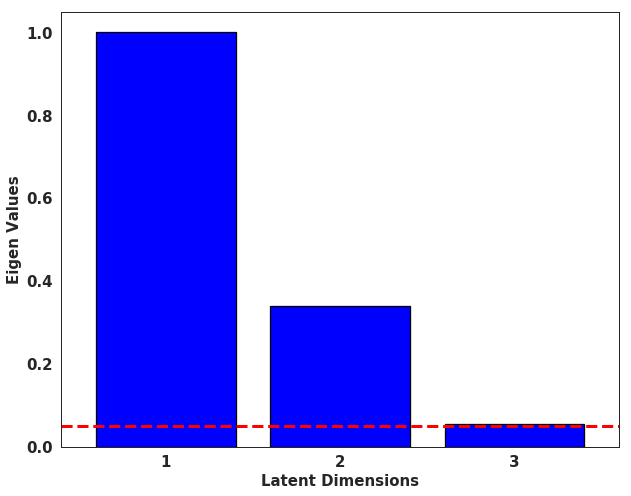

0 1


<Figure size 432x288 with 0 Axes>

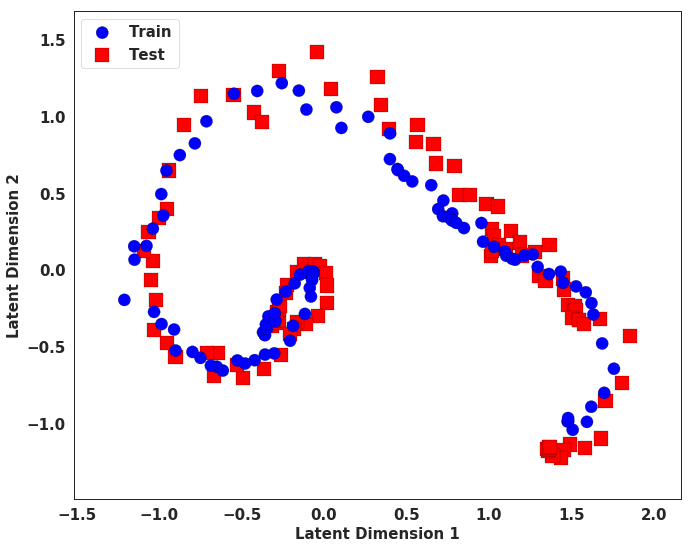

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i    f              |g|        
    00s19  02  -1.712578e+04   7.639679e+04 
    02s23  36  -1.877877e+04   9.188009e+02 
    03s07  52  -1.892322e+04   7.238324e+02 
Runtime:     03s07
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    00s15  003  -1.288946e+04   6.905947e+08 
    03s23  053  -3.218043e+04   1.475058e+04 
    10s48  177  -3.351367e+04   3.042451e+04 
    29s57  503  -3.448370e+04   3.410248e+04 
Runtime:     29s57
Optimization status: Maximum number of f evaluations reached

....................................................................................................
....................................................................................................
gplvm: 0.082706, 0.107724


<Figure size 432x288 with 0 Axes>

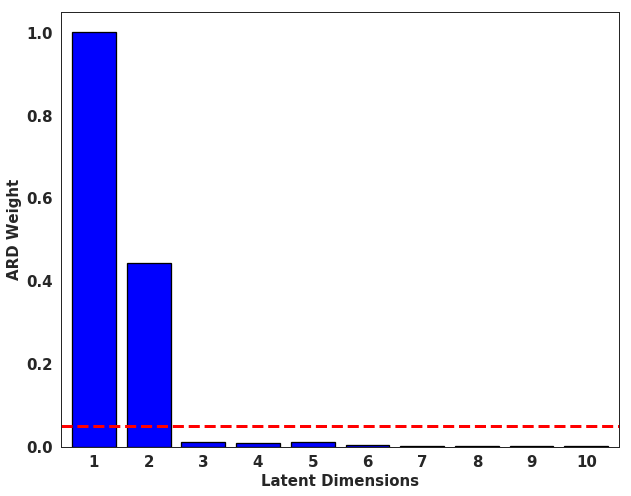

1 0


<Figure size 432x288 with 0 Axes>

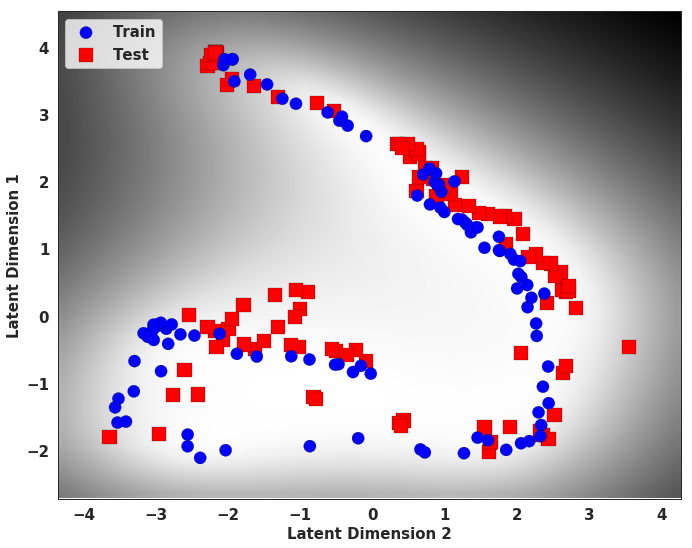

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i    f              |g|        
    00s13  02   8.329176e+05   1.844570e+10 
    02s31  30  -1.012238e+04   3.006830e+03 
    03s90  52  -1.251339e+04   3.173047e+03 
Runtime:     03s90
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    00s11  002  -1.392237e+04   1.218082e+06 
    00s18  003  -1.400404e+04   1.996371e+05 
    02s25  032  -1.549989e+04   3.743093e+04 
    09s42  135  -1.798505e+04   9.851052e+03 
    16s75  227  -1.840113e+04   1.102712e+03 
    34s15  502  -1.855550e+04   2.297330e+02 
Runtime:     34s15
Optimization status: Maximum number of f evaluations reached

....................................................................................................
....................................................................................................
bgplvm: 0.052745, 0.077025


<Figure size 432x288 with 0 Axes>

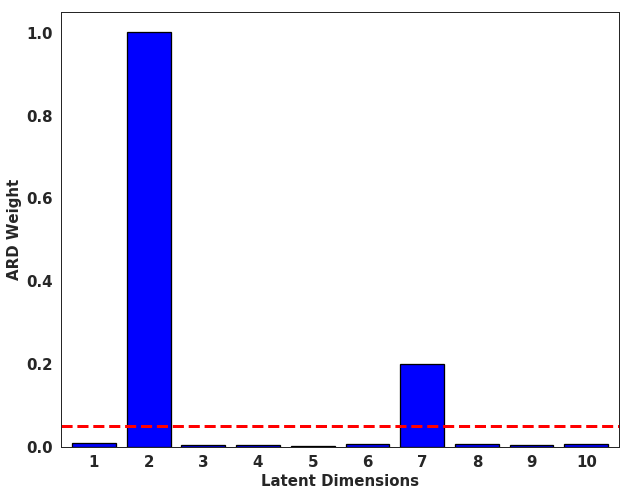

6 1


<Figure size 432x288 with 0 Axes>

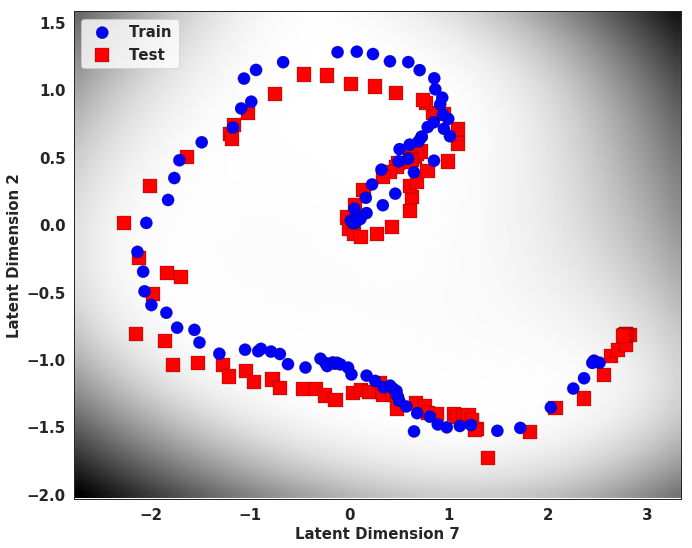

<Figure size 432x288 with 0 Axes>

In [16]:
# Initial Verification for both datasets
nDims = [12,24]
features = ['JA', 'JD']
datasets = {'JA': JAData, 'JD': JDData}

for feature, nDim in zip(features, nDims):
    # start the loop
    print(feature, nDim)

    # variable initialization
    nPostures = 6
    nSamples = 100

    # setup the training and test indices
    tsInds = [1]
    trInds = [2,3,4,5,6]
    trData = np.empty((0,nDim))
    tsData = np.empty((0,nDim))

    # training and test data
    for trInd in trInds:
        trData = np.vstack((trData,datasets[feature][trInd][:,1:]))
    for tsInd in tsInds:
        tsData = np.vstack((tsData,datasets[feature][tsInd][:,1:]))

    # shuffling is optional for this dataset
    # np.random.shuffle(trData)
    # np.random.shuffle(tsData)
    
    # variables for model training
    fixDim = 3
    initDim = 10
    wThresh = 0.05

    init = 'rand'
    initIter = 50
    trainIter = 500
    numInducing = 30

    expModels = {}
    expResults = {}
    expName = 'modelComp'
    lvms = ['pca','gplvm','bgplvm']
    expData = {'train': trData, 'test': tsData}

    ardFlag = True

    for lvm in lvms:  
        if lvm == 'pca':
            plotIndices = [0,1]
            model = pcaModel(trData, expName, qDim=fixDim)
            results = pcaError(model, trData[:nSamples,:], tsData)
        elif lvm == 'gplvm':
            plotIndices = None
            model = gplvmModel(trData, expName, qDim=initDim, initIters=initIter, 
                               trainIters=trainIter, init='pca', ard=ardFlag)
            results = gplvmError(model, trData[:nSamples,:], tsData, ard=ardFlag)        
        elif lvm == 'bgplvm':
            plotIndices = None
            model = bgplvmModel(trData, expName, qDim = initDim, nInducing=numInducing, 
                                initIters=initIter, trainIters=trainIter, init='rand', ard=ardFlag)
            results = bgplvmError(model, trData[:nSamples,:], tsData, ard=ardFlag)    
        
        expModels[lvm] = model
        expResults[lvm] = results
        print('%s: %f, %f' % (lvm, results[4].mean(), results[5].mean()))
    
        ax = plotScales(model, lvm=lvm)
        plt.savefig('Results/%s/%sScales.png' % (feature,lvm))    
        ax = plotLatent(model, results[0], results[1], lvm=lvm, plotIndices=plotIndices)
        plt.savefig('Results/%s/%sSpace.png' % (feature,lvm))
    
    pickle.dump(expData, open('Dataset/InitExp%s.p' % (feature),'wb'))
    pickle.dump(expModels, open('Models/InitExp%s.p' % (feature),'wb'))
    pickle.dump(expResults, open('Results/InitExp%s.p' % (feature),'wb'))

## Complete Dataset Validation
---

JA 12
1, pca: 0.026833, 0.031911


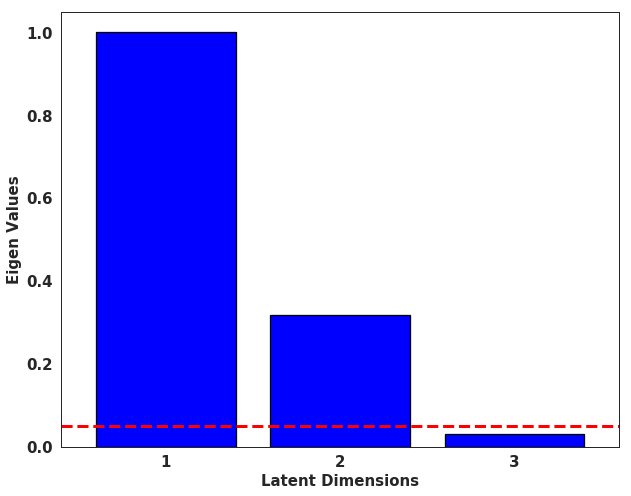

0 1


<Figure size 432x288 with 0 Axes>

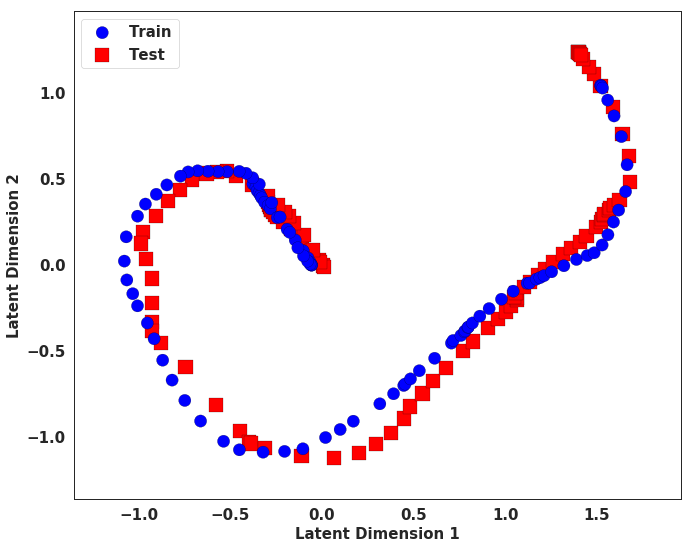

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    00s18  003  -7.714807e+03   2.960623e+03 

 /home/dl-box/miniconda3/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1



    02s32  037  -7.907732e+03   1.081025e+02 
    05s36  102  -7.938425e+03   2.526122e+01 
Runtime:     05s36
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s19  0003  -2.009437e+04   8.858749e+05 
    02s22  0044  -2.501983e+04   5.031995e+06 
    09s44  0186  -2.748383e+04   6.406363e+06 
    25s82  0556  -2.936818e+04   1.468513e+07 
    45s50  1002  -3.086825e+04   5.359497e+06 
Runtime:     45s50
Optimization status: Maximum number of f evaluations reached

....................................................................................................
....................................................................................................
1, gplvm: 0.038067, 0.045972


<Figure size 432x288 with 0 Axes>

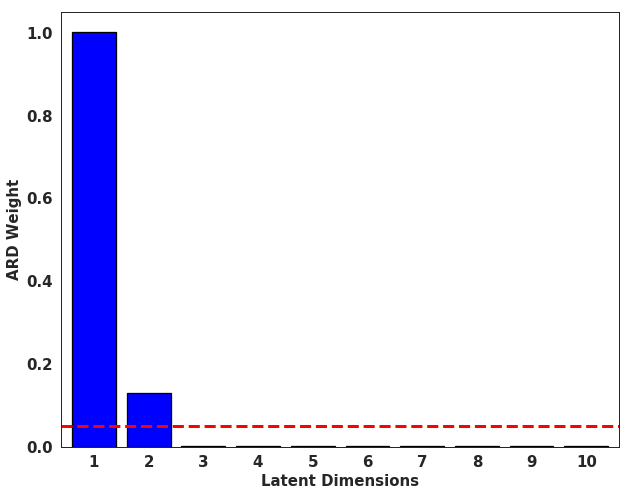

1 0


<Figure size 432x288 with 0 Axes>

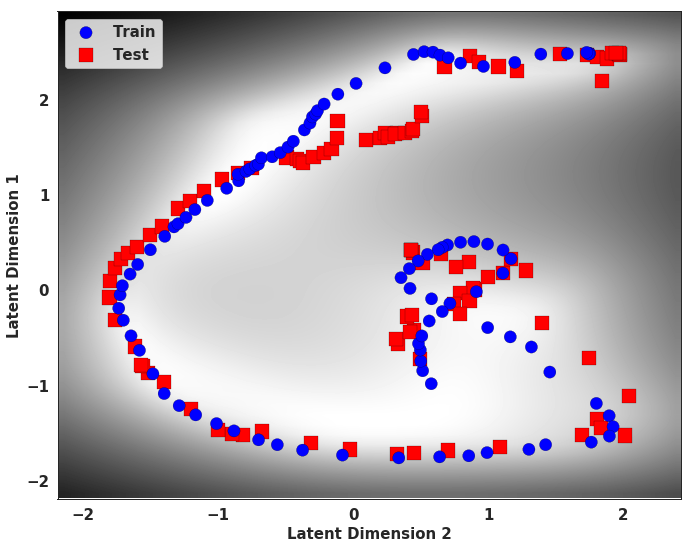

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    00s10  001   4.677579e+05   7.321135e+09 
    01s19  011   8.602795e+03   2.272496e+05 
    04s44  033  -2.648882e+03   1.143046e+05 
    08s61  063  -4.982536e+03   6.088840e+03 
    14s33  102  -5.170988e+03   2.689885e+02 
Runtime:     14s33
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    01s23  0010  -7.042456e+03   3.659441e+04 
    05s49  0046  -8.446237e+03   4.394302e+04 
    18s26  0150  -1.001974e+04   4.828847e+04 
    51s29  0434  -1.082891e+04   5.213455e+04 
 01m58s53  1002  -1.172696e+04   2.378082e+04 
Runtime:  01m58s53
Optimization status: Maximum number of f evaluations reached

....................................................................................................
.........................................................................................

<Figure size 432x288 with 0 Axes>

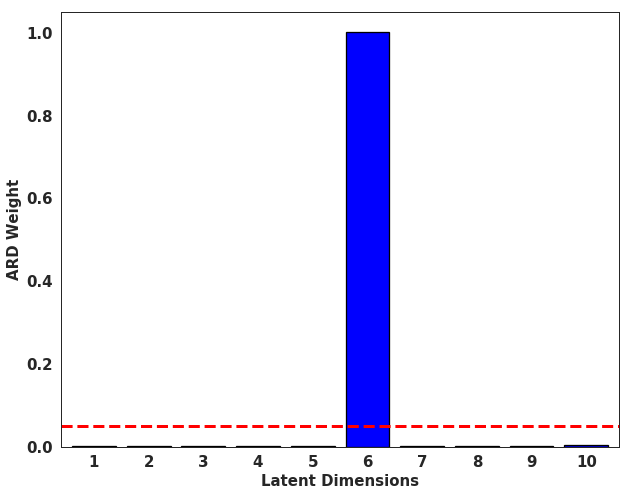

9 5


<Figure size 432x288 with 0 Axes>

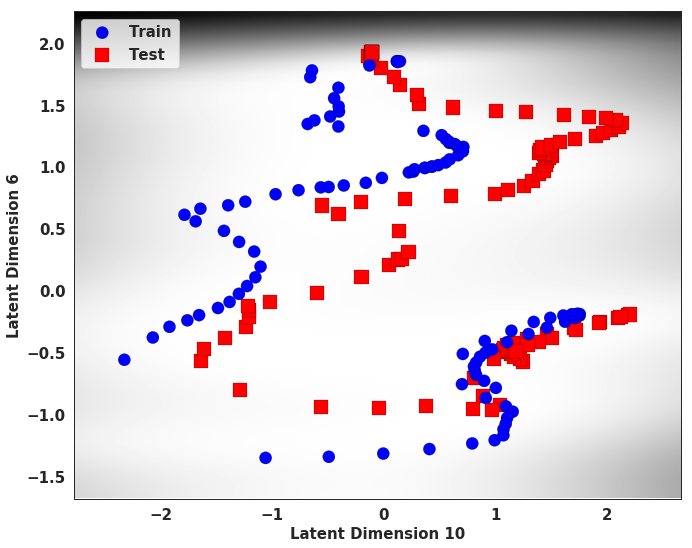

2, pca: 0.029593, 0.027998


<Figure size 432x288 with 0 Axes>

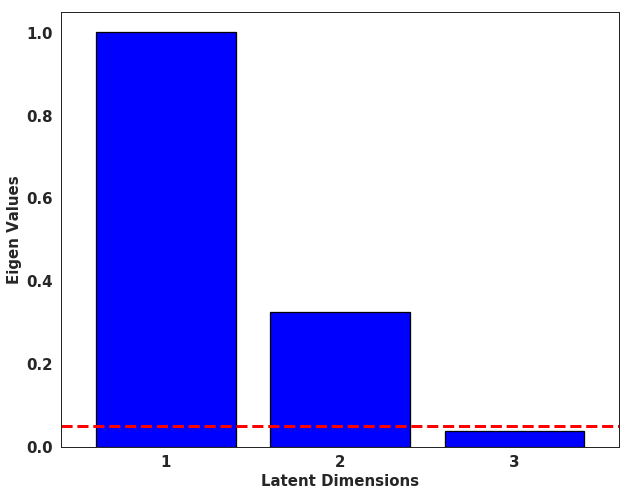

0 1


<Figure size 432x288 with 0 Axes>

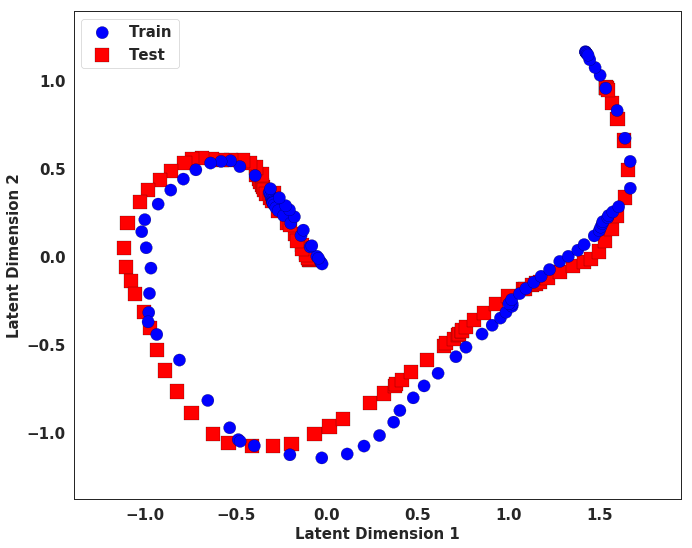

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    00s15  002  -7.621178e+03   7.692770e+03 
    02s22  042  -7.899822e+03   9.686745e+01 
    05s06  102  -7.927051e+03   4.351093e+00 
Runtime:     05s06
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s16  0003  -2.009160e+04   6.284610e+05 
    03s21  0066  -2.586979e+04   6.095647e+06 
    11s47  0233  -2.804820e+04   5.162274e+06 
    32s90  0691  -3.056870e+04   7.636455e+06 
    49s74  1002  -3.115517e+04   4.825180e+06 
Runtime:     49s74
Optimization status: Maximum number of f evaluations reached

....................................................................................................
....................................................................................................
2, gplvm: 0.043808, 0.038659


<Figure size 432x288 with 0 Axes>

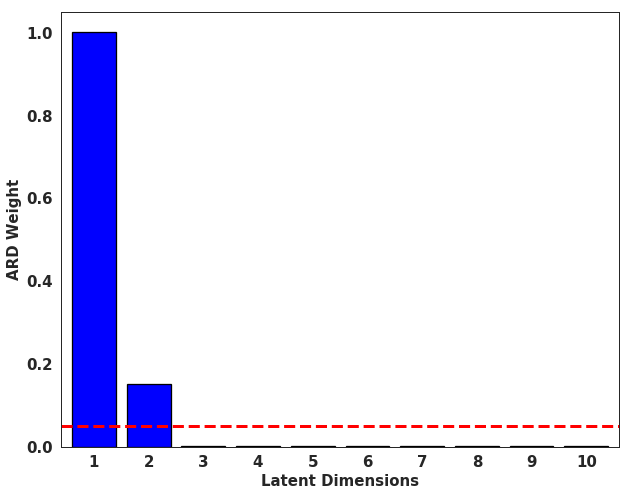

1 0


<Figure size 432x288 with 0 Axes>

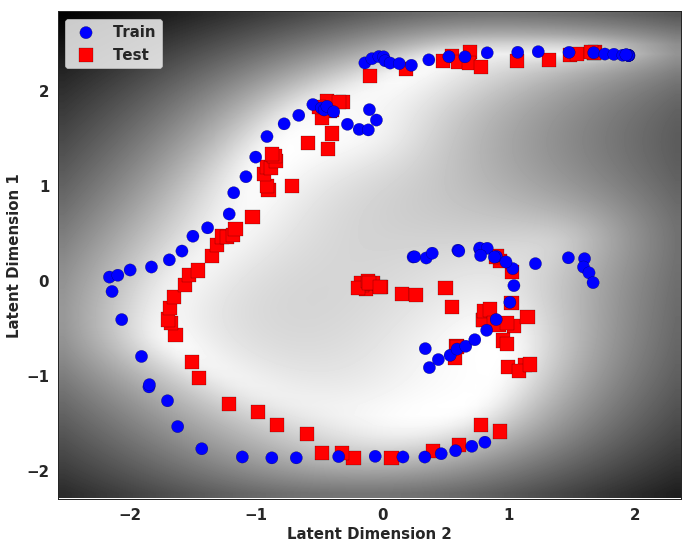

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    01s13  011   7.158599e+03   9.563658e+04 
    02s26  018   1.672774e+03   3.168826e+04 
    06s50  054  -4.812999e+03   1.769395e+03 
    12s17  102  -5.078746e+03   1.220894e+02 
Runtime:     12s17
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s12  0001  -5.078746e+03   3.907431e+06 
    03s27  0026  -7.778714e+03   1.146680e+04 
    11s77  0096  -9.375028e+03   2.808199e+04 
    34s90  0277  -1.083725e+04   2.616952e+04 
 01m39s64  0790  -1.226898e+04   3.279129e+04 
 02m06s44  1003  -1.249395e+04   4.620325e+04 
Runtime:  02m06s44
Optimization status: Maximum number of f evaluations reached

....................................................................................................
........................................................................................

<Figure size 432x288 with 0 Axes>

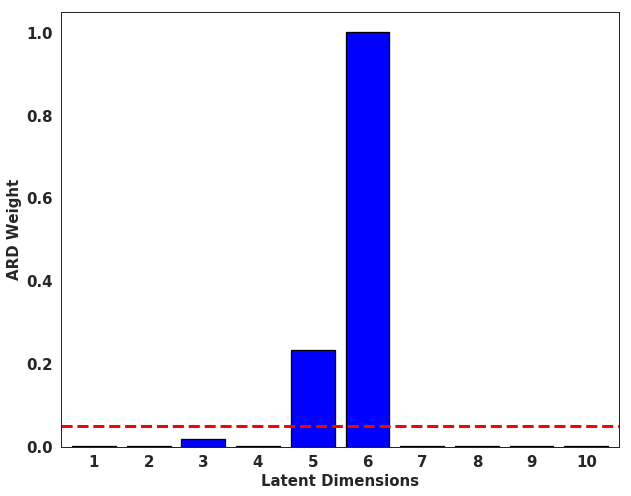

4 5


<Figure size 432x288 with 0 Axes>

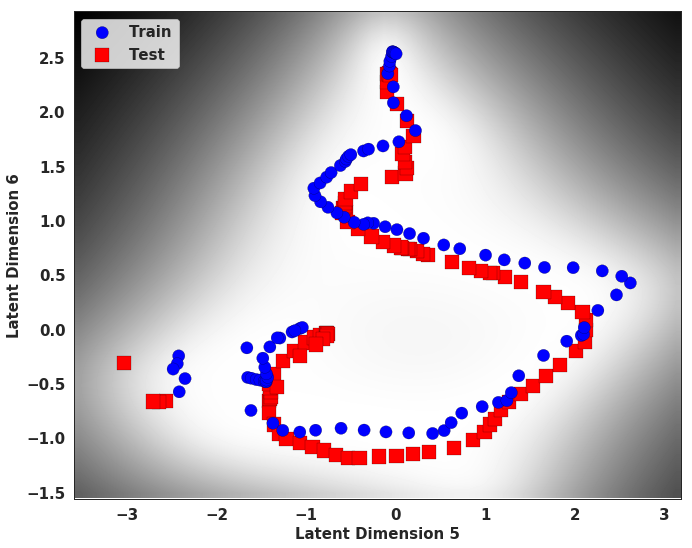

3, pca: 0.029703, 0.031180


<Figure size 432x288 with 0 Axes>

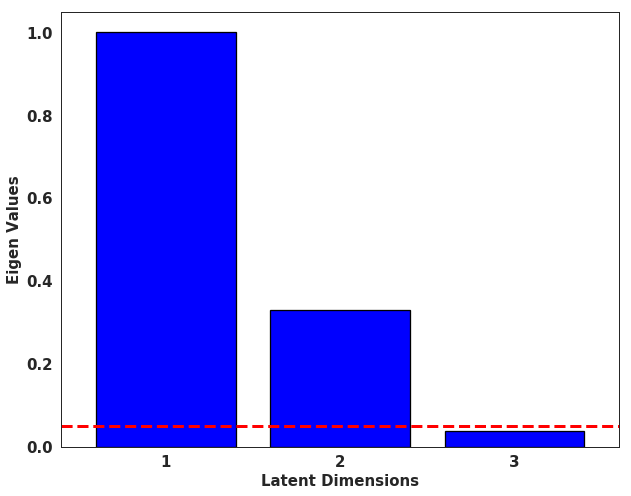

0 1


<Figure size 432x288 with 0 Axes>

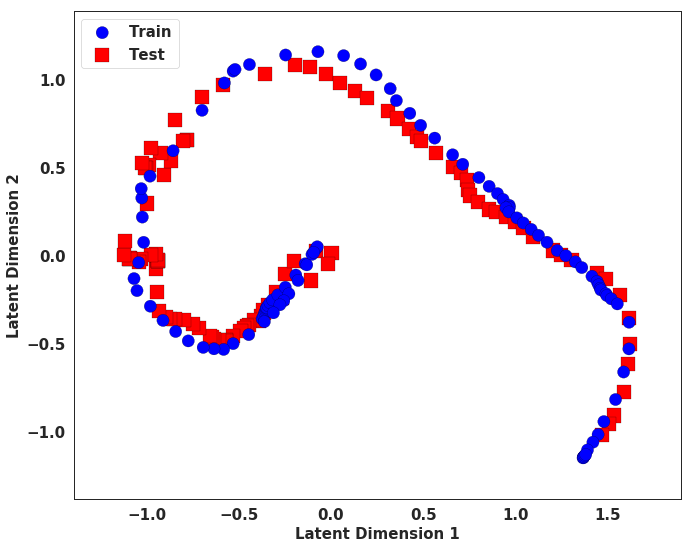

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    00s13  002  -7.611441e+03   7.807447e+03 
    02s18  047  -7.890930e+03   3.350544e+01 
    04s77  102  -7.911670e+03   2.346170e+00 
Runtime:     04s77
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s11  0002  -1.076654e+04   7.950499e+06 
    00s16  0003  -1.931188e+04   2.954699e+05 
    02s21  0048  -2.479665e+04   4.924261e+06 
    08s28  0179  -2.670231e+04   1.022487e+07 
    24s58  0542  -2.878841e+04   4.422247e+07 
    44s87  1002  -3.038480e+04   2.349187e+07 
Runtime:     44s87
Optimization status: Maximum number of f evaluations reached

....................................................................................................
....................................................................................................
3, gplvm: 0.045875, 0.047462


<Figure size 432x288 with 0 Axes>

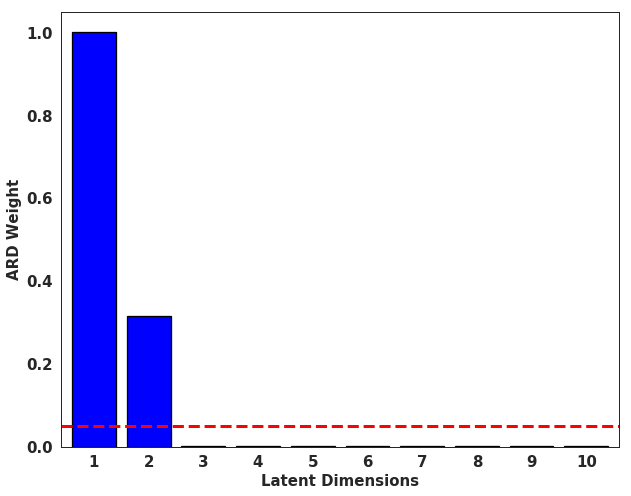

1 0


<Figure size 432x288 with 0 Axes>

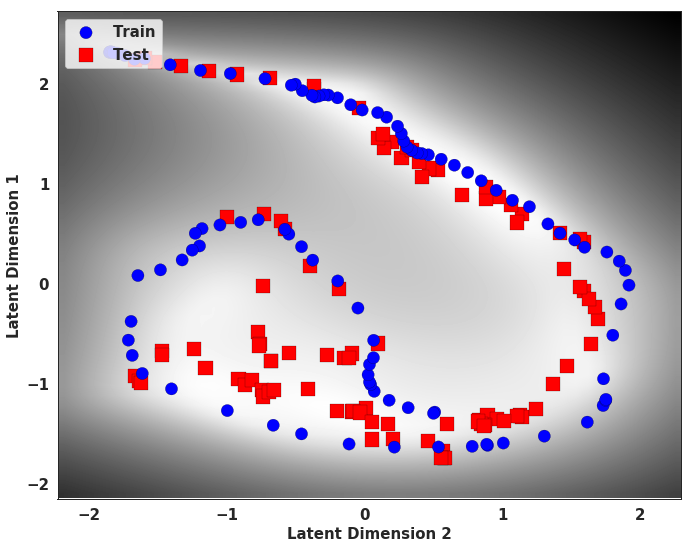

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    01s20  012   7.116359e+03   1.160064e+05 
    03s36  028  -1.350956e+03   3.914827e+03 
    06s47  054  -4.820164e+03   1.217885e+03 
    11s89  102  -5.039148e+03   1.587454e+02 
Runtime:     11s89
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s13  0001  -5.039148e+03   3.891728e+06 
    03s33  0027  -7.863792e+03   8.531753e+03 
    10s75  0086  -9.148294e+03   2.325353e+04 
    31s74  0259  -1.066962e+04   2.938005e+04 
 01m31s09  0742  -1.188394e+04   3.726735e+04 
 02m02s16  1002  -1.209843e+04   1.445851e+04 
Runtime:  02m02s16
Optimization status: Maximum number of f evaluations reached

....................................................................................................
........................................................................................

<Figure size 432x288 with 0 Axes>

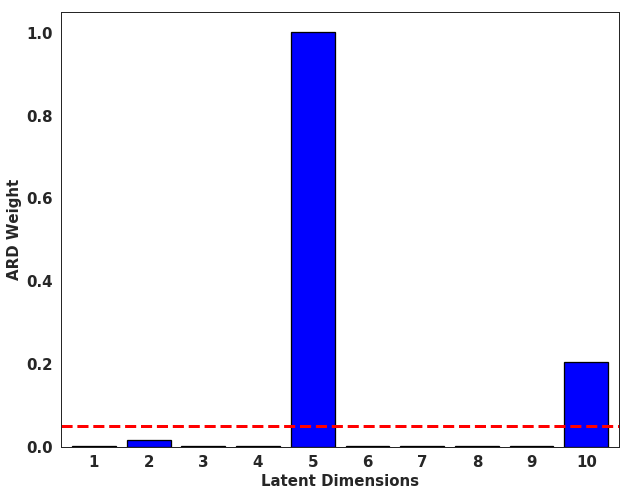

9 4


<Figure size 432x288 with 0 Axes>

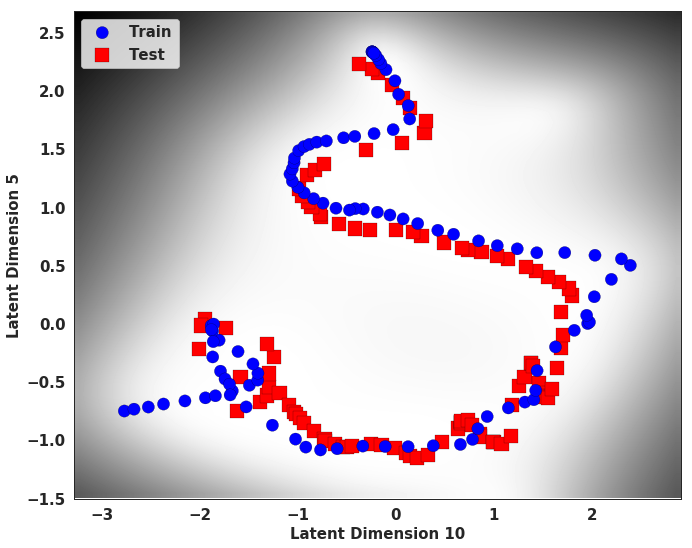

4, pca: 0.029315, 0.032240


<Figure size 432x288 with 0 Axes>

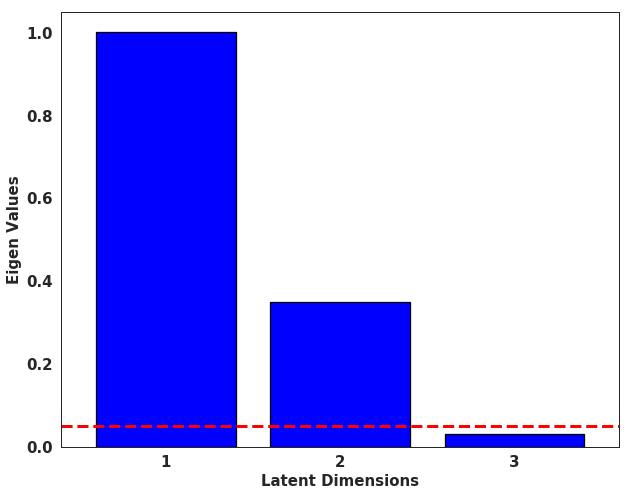

0 1


<Figure size 432x288 with 0 Axes>

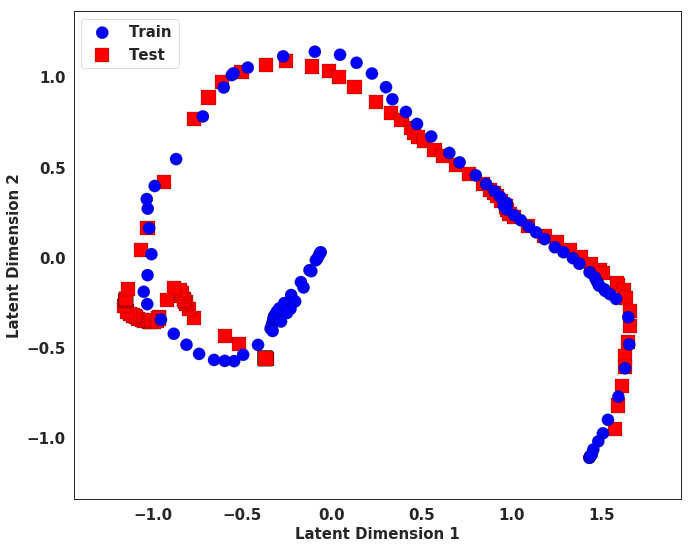

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    00s17  003  -7.631643e+03   2.918454e+03 
    03s32  060  -7.896786e+03   1.539008e+01 
    05s57  102  -7.904183e+03   1.646298e+01 
Runtime:     05s57
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s19  0003  -1.944069e+04   4.128946e+05 
    03s30  0069  -2.560650e+04   3.264501e+06 
    11s42  0247  -2.829692e+04   5.227224e+06 
    35s91  0745  -3.014362e+04   4.146151e+06 
    49s44  1002  -3.041331e+04   3.833354e+06 
Runtime:     49s44
Optimization status: Maximum number of f evaluations reached

....................................................................................................
....................................................................................................
4, gplvm: 0.040802, 0.049125


<Figure size 432x288 with 0 Axes>

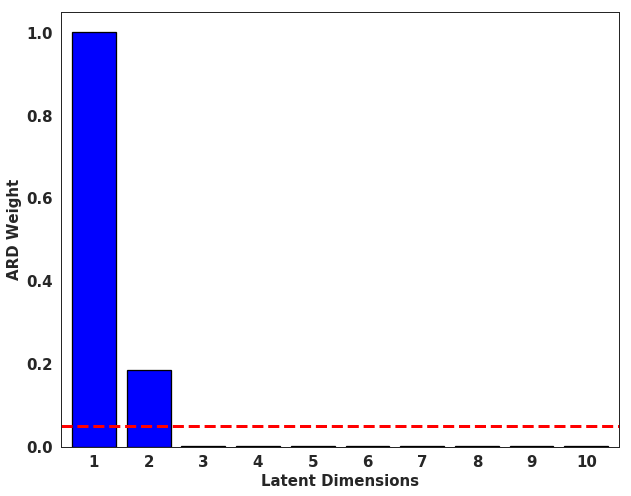

1 0


<Figure size 432x288 with 0 Axes>

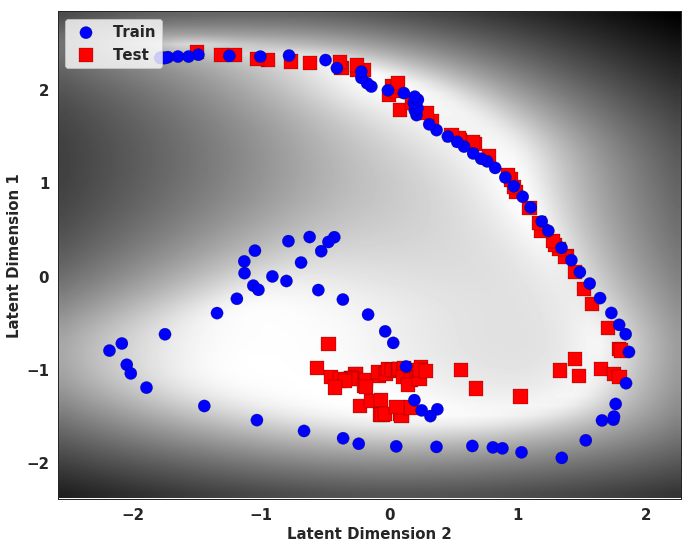

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    00s01  000   4.786876e+05           nan 
    00s11  001   4.786876e+05   7.545711e+09 
    02s22  018   1.690552e+03   1.465424e+04 
    06s48  050  -4.736022e+03   1.691925e+03 
    11s73  096  -5.044317e+03   1.597682e+02 
    12s78  102  -5.051595e+03   8.492965e+01 
Runtime:     12s78
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    01s26  0009  -6.842377e+03   1.843684e+04 
    05s38  0047  -8.380778e+03   2.115041e+04 
    18s08  0150  -1.035285e+04   2.170634e+04 
    52s00  0441  -1.139029e+04   1.693972e+04 
 02m03s00  1002  -1.208124e+04   1.155955e+04 
Runtime:  02m03s00
Optimization status: Maximum number of f evaluations reached

....................................................................................................
............................................

<Figure size 432x288 with 0 Axes>

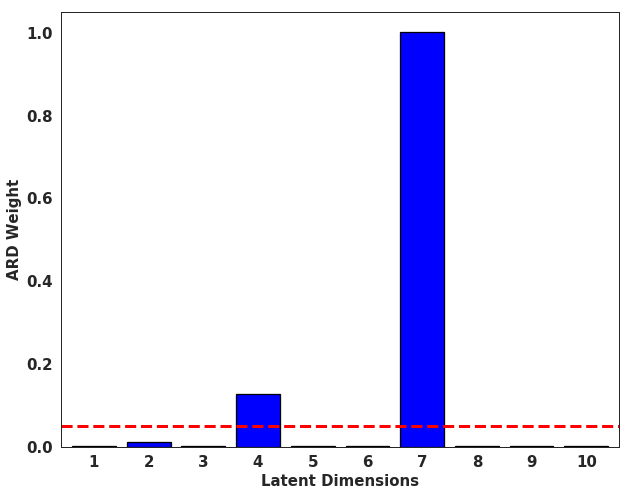

3 6


<Figure size 432x288 with 0 Axes>

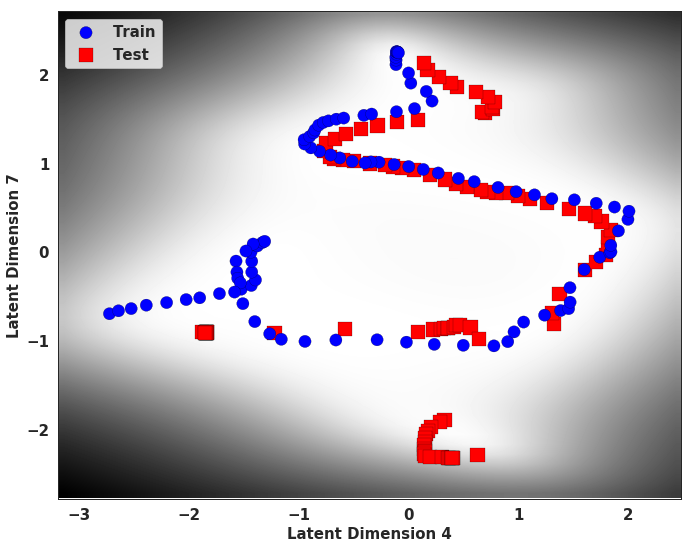

5, pca: 0.029244, 0.029721


<Figure size 432x288 with 0 Axes>

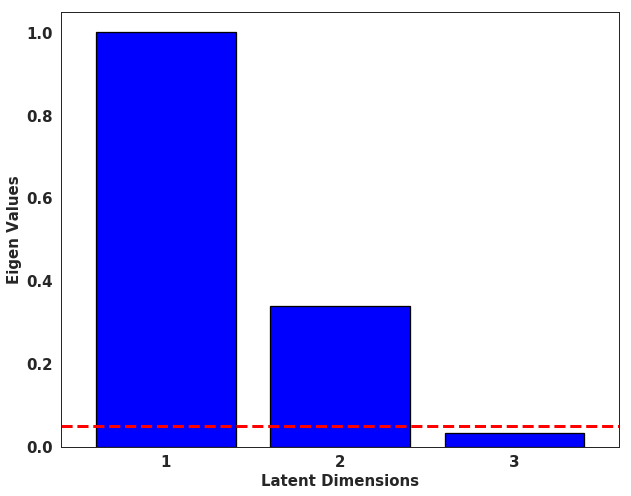

0 1


<Figure size 432x288 with 0 Axes>

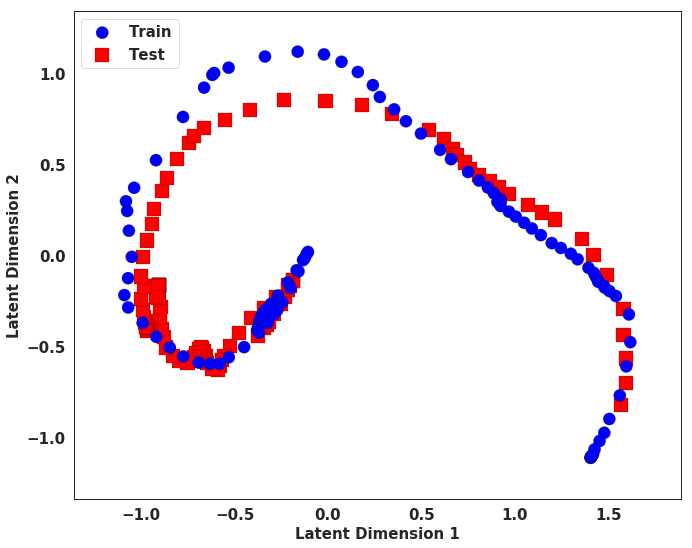

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    00s15  003  -7.636181e+03   2.961120e+03 
    03s19  062  -7.842608e+03   1.878847e+01 
    05s21  102  -7.851733e+03   1.373007e+01 
Runtime:     05s21
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s18  0003  -1.872945e+04   6.208683e+05 
    03s29  0060  -2.543835e+04   7.308431e+06 
    17s97  0211  -2.731529e+04   8.685151e+06 
    54s32  0609  -2.911348e+04   5.117743e+06 
 01m45s66  1002  -3.035393e+04   1.462457e+07 
Runtime:  01m45s66
Optimization status: Maximum number of f evaluations reached

....................................................................................................
....................................................................................................
5, gplvm: 0.034899, 0.041361


<Figure size 432x288 with 0 Axes>

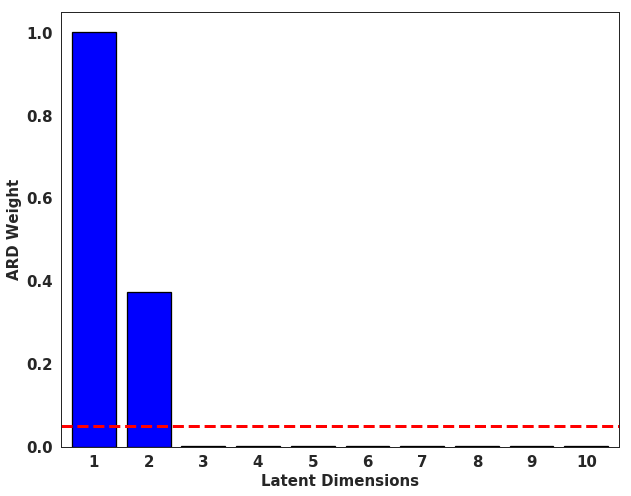

1 0


<Figure size 432x288 with 0 Axes>

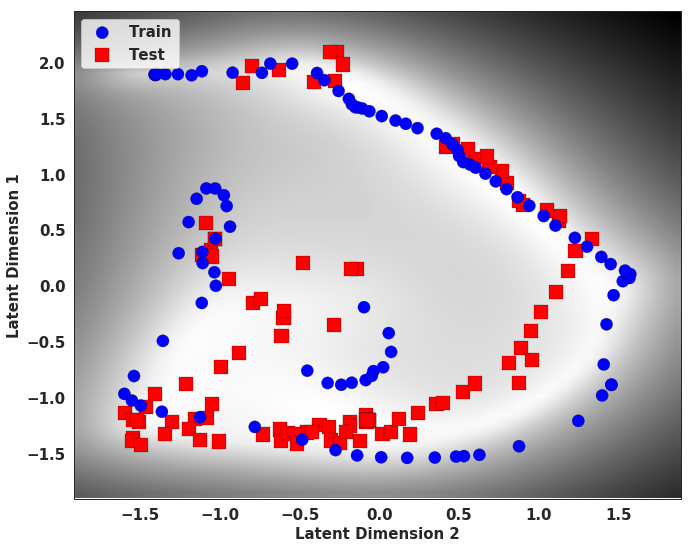

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    03s56  011   8.884807e+03   2.058815e+05 
    06s75  020   1.457906e+03   1.646692e+04 
    19s52  061  -4.285878e+03   3.558357e+03 
    25s84  082  -4.779691e+03   8.929090e+02 
    32s12  102  -4.944442e+03   2.111788e+02 
Runtime:     32s12
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    01s19  0003  -6.514199e+03   9.153605e+05 
    06s02  0017  -7.722835e+03   3.303639e+04 
    13s99  0053  -8.972243e+03   1.910115e+04 
    28s19  0165  -1.055810e+04   1.980887e+04 
 01m36s18  0474  -1.162435e+04   3.914659e+04 
 04m12s05  1002  -1.235297e+04   9.990692e+03 
Runtime:  04m12s05
Optimization status: Maximum number of f evaluations reached

....................................................................................................
..........................................

<Figure size 432x288 with 0 Axes>

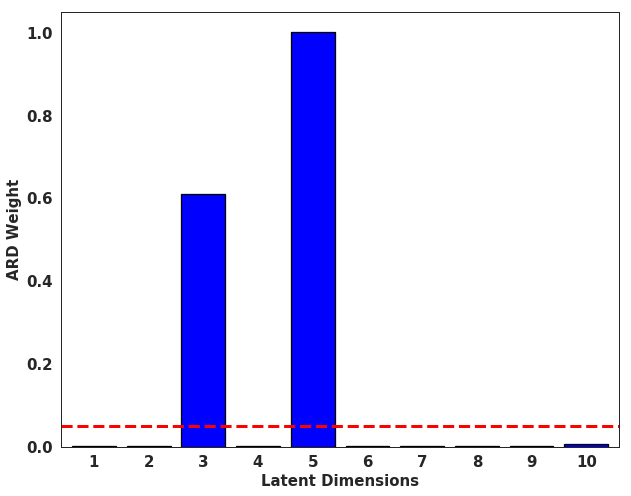

2 4


<Figure size 432x288 with 0 Axes>

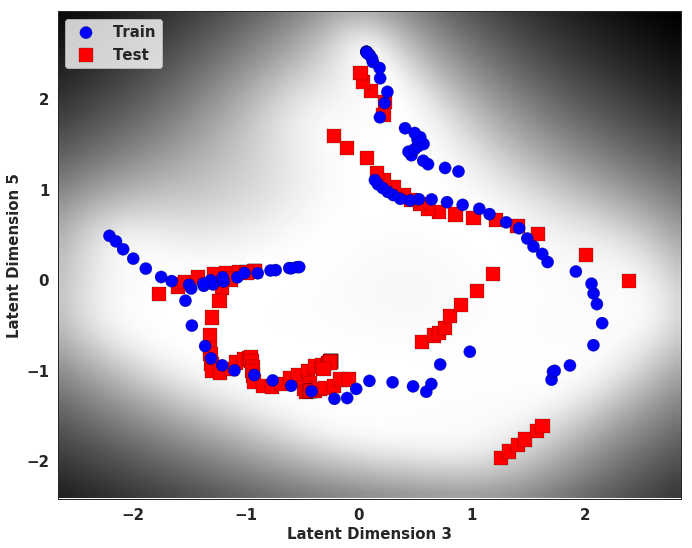

6, pca: 0.029617, 0.024203


<Figure size 432x288 with 0 Axes>

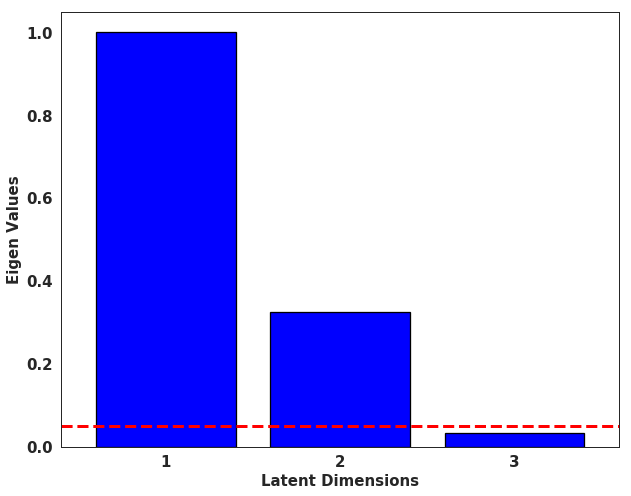

0 1


<Figure size 432x288 with 0 Axes>

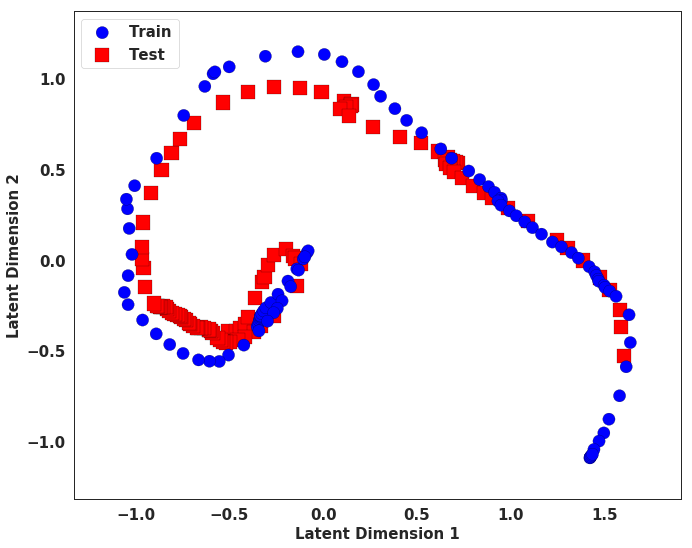

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    00s12  001  -7.467562e+03   2.052437e+04 
    03s25  032  -7.851357e+03   2.107808e+02 
    12s40  102  -7.893815e+03   4.497133e+00 
Runtime:     12s40
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    01s24  0009  -1.982937e+04   3.945982e+05 
    05s59  0041  -2.505427e+04   2.301290e+07 
    17s38  0134  -2.696412e+04   3.659776e+06 
    53s02  0392  -2.875698e+04   1.018147e+07 
 01m43s13  1002  -3.096680e+04   4.067133e+06 
Runtime:  01m43s13
Optimization status: Maximum number of f evaluations reached

....................................................................................................
....................................................................................................
6, gplvm: 0.036741, 0.036721


<Figure size 432x288 with 0 Axes>

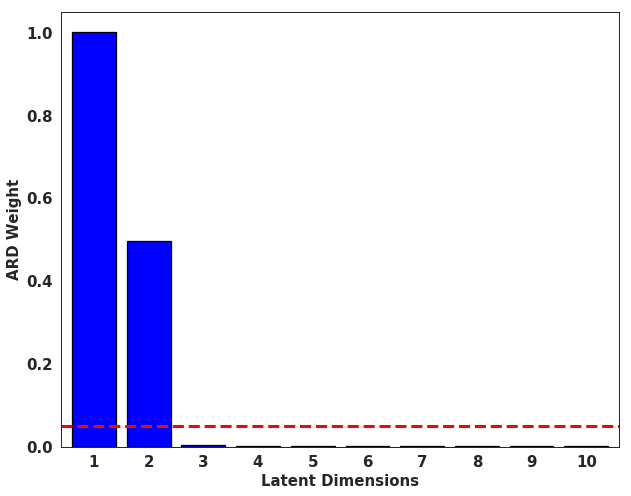

1 0


<Figure size 432x288 with 0 Axes>

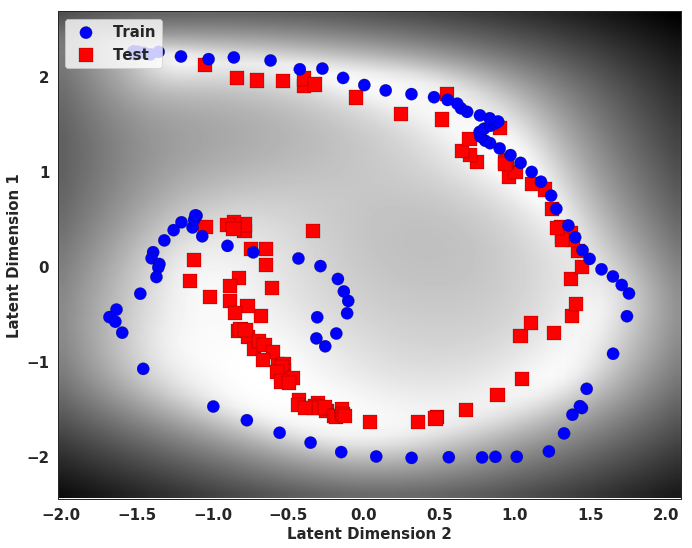

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    00s13  001   4.807033e+05   7.850650e+09 
    01s25  011   8.118360e+03   2.084189e+05 
    03s39  027  -4.052935e+02   8.843241e+03 
    06s72  050  -4.406559e+03   2.866476e+03 
    10s96  089  -4.936924e+03   1.609699e+02 
    12s40  102  -4.963139e+03   5.950573e+01 
Runtime:     12s40
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s11  0001  -4.963139e+03   4.032025e+06 
    03s12  0029  -7.982506e+03   5.580430e+04 
    11s62  0100  -9.833508e+03   5.371953e+04 
    35s78  0300  -1.096363e+04   1.626957e+04 
 01m44s21  0858  -1.191532e+04   1.012800e+04 
 02m01s31  1002  -1.204689e+04   1.723716e+04 
Runtime:  02m01s31
Optimization status: Maximum number of f evaluations reached

.................................................................................................

<Figure size 432x288 with 0 Axes>

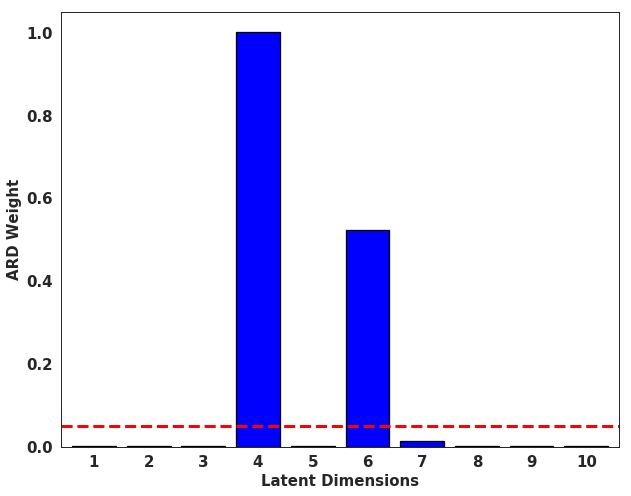

5 3


<Figure size 432x288 with 0 Axes>

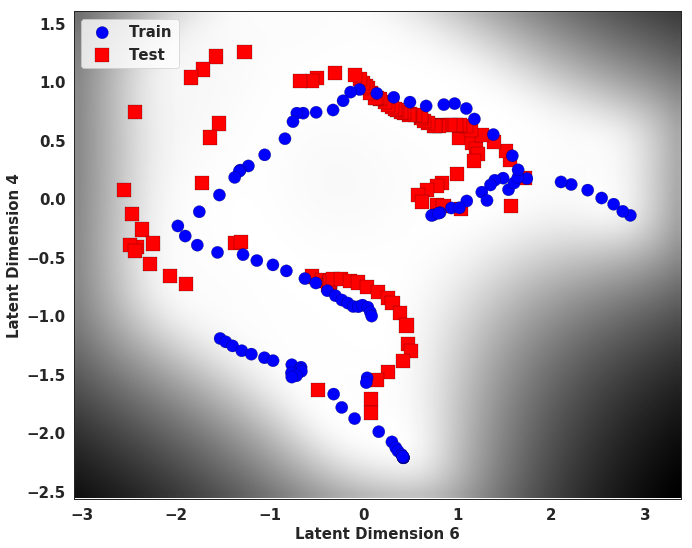

JD 24
1, pca: 0.057117, 0.083480


<Figure size 432x288 with 0 Axes>

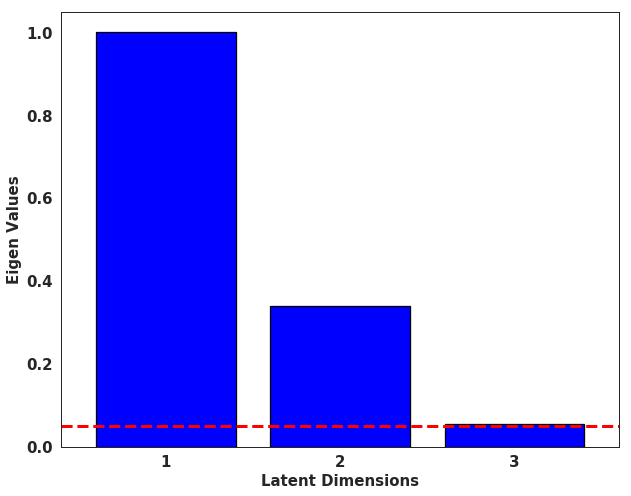

0 1


<Figure size 432x288 with 0 Axes>

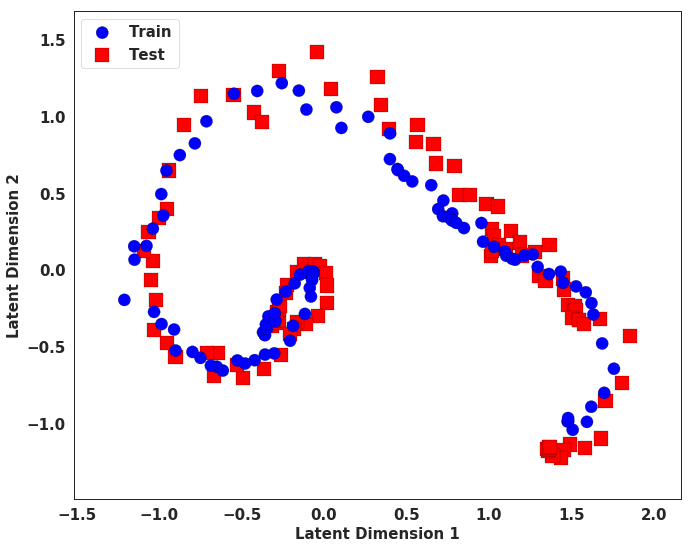

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    00s18  003  -1.747663e+04   3.207007e+04 
    02s23  038  -1.879993e+04   4.467647e+02 
    05s51  102  -1.906277e+04   7.826861e+00 
Runtime:     05s51
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s19  0004  -3.089820e+04   3.217025e+06 
    03s28  0063  -3.229205e+04   1.625354e+04 
    10s40  0225  -3.378905e+04   1.574464e+04 
    30s95  0659  -3.499782e+04   6.113169e+03 
    47s96  1002  -3.547099e+04   4.679718e+03 
Runtime:     47s96
Optimization status: Maximum number of f evaluations reached

....................................................................................................
....................................................................................................
1, gplvm: 0.095481, 0.118030


<Figure size 432x288 with 0 Axes>

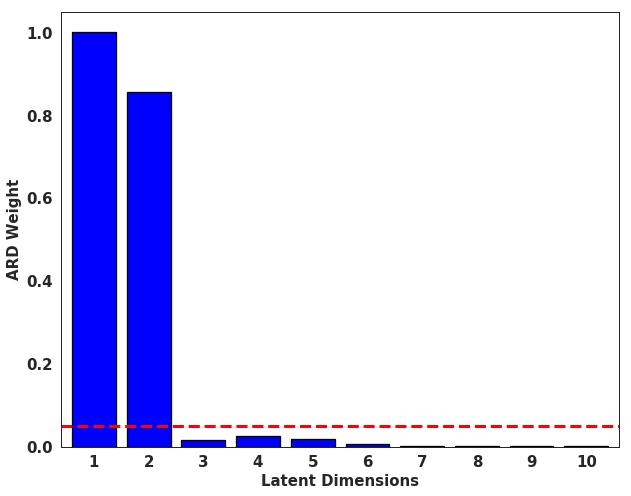

1 0


<Figure size 432x288 with 0 Axes>

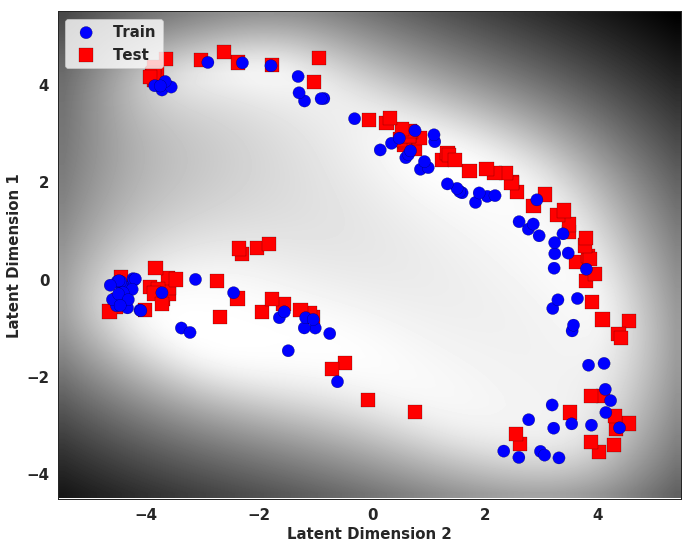

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    01s22  009   1.377466e+04   2.797074e+06 
    03s31  028  -8.592504e+03   9.804280e+03 
    09s69  083  -1.315442e+04   4.189891e+03 
    11s93  102  -1.328621e+04   3.663063e+02 
Runtime:     11s93
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s17  0001  -1.328621e+04   1.012969e+07 
    03s28  0026  -1.579326e+04   5.949823e+03 
    11s63  0096  -1.720479e+04   1.212392e+04 
    37s04  0289  -1.871342e+04   3.660343e+03 
 01m42s02  0822  -1.904556e+04   1.922585e+02 
 02m04s02  1002  -1.906182e+04   1.612886e+02 
Runtime:  02m04s02
Optimization status: Maximum number of f evaluations reached

....................................................................................................
........................................................................................

<Figure size 432x288 with 0 Axes>

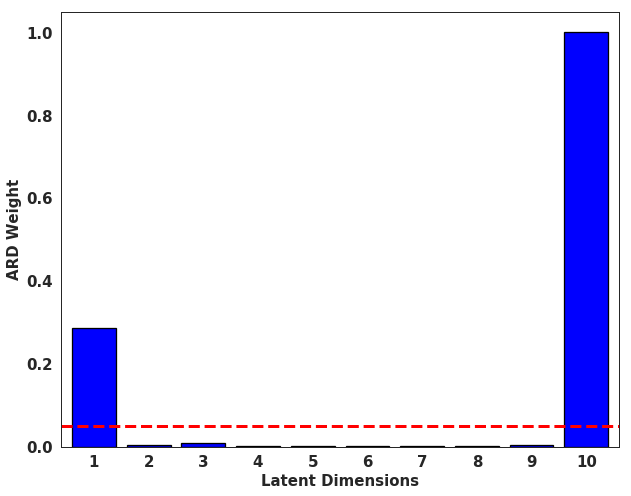

0 9


<Figure size 432x288 with 0 Axes>

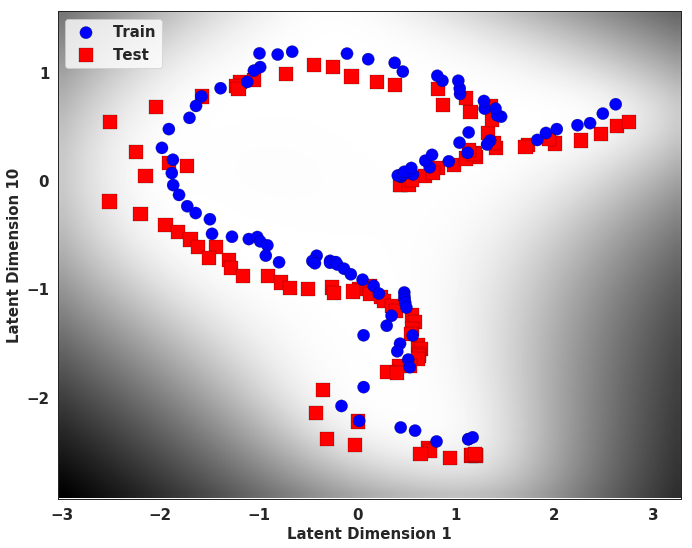

2, pca: 0.078555, 0.059618


<Figure size 432x288 with 0 Axes>

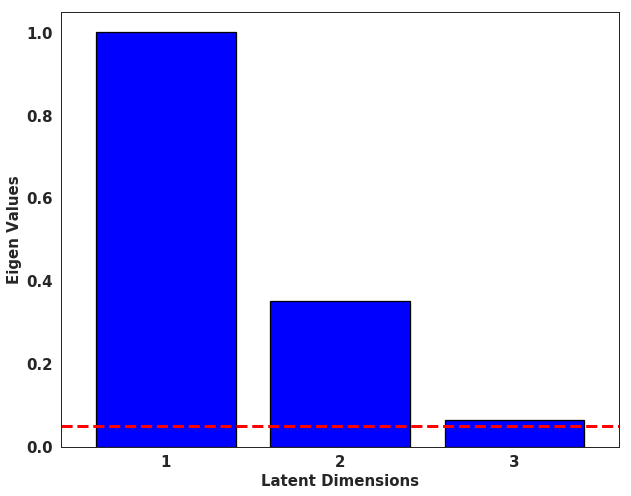

0 1


<Figure size 432x288 with 0 Axes>

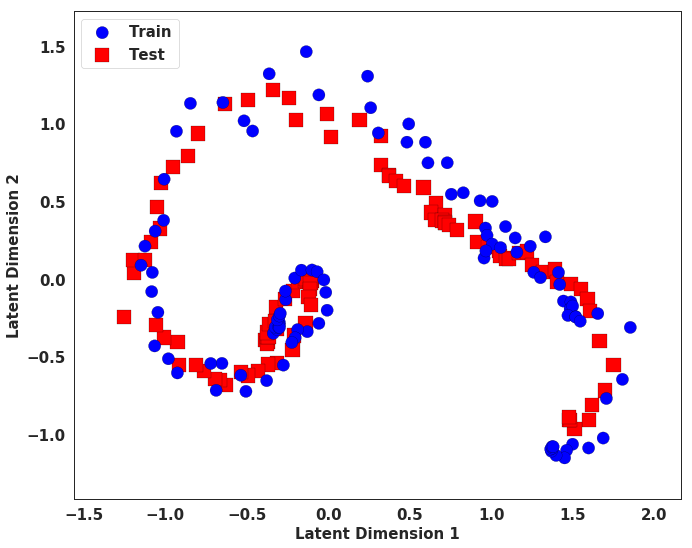

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    00s12  002  -1.696146e+04   8.642727e+04 
    00s17  003  -1.735342e+04   3.078861e+04 
    03s26  059  -1.891561e+04   7.801912e+01 
    05s32  102  -1.895813e+04   7.372153e+00 
Runtime:     05s32
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s10  0002  -2.413244e+04   2.346662e+07 
    00s14  0003   2.002145e+06   3.268050e+12 
    02s17  0042  -3.134914e+04   2.761225e+04 
    08s27  0169  -3.340093e+04   1.750737e+04 
    24s66  0523  -3.465658e+04   7.706388e+03 
    45s25  1002  -3.520074e+04   1.633537e+04 
Runtime:     45s25
Optimization status: Maximum number of f evaluations reached

....................................................................................................
........................................................................................

<Figure size 432x288 with 0 Axes>

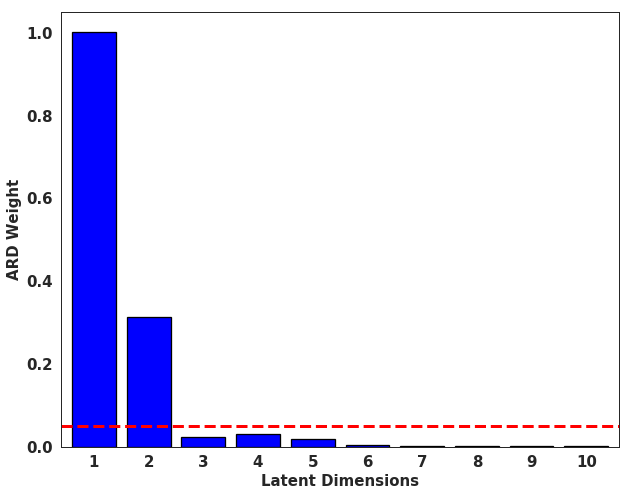

1 0


<Figure size 432x288 with 0 Axes>

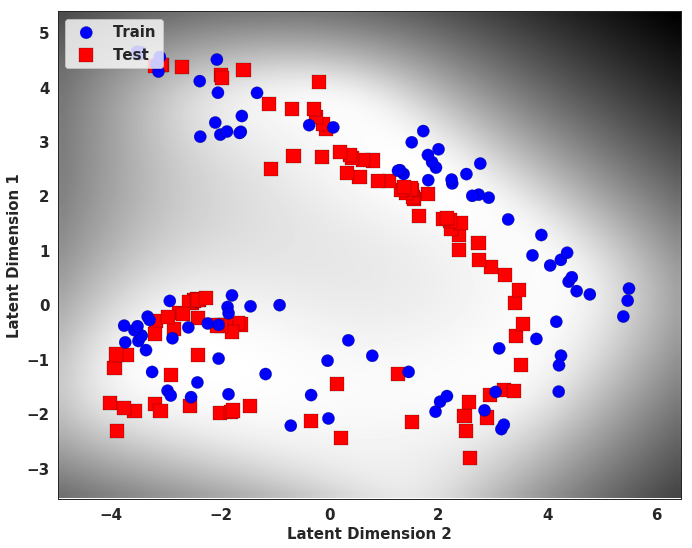

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    00s12  001   9.115029e+05   2.275411e+10 
    01s16  011   9.666946e+03   6.216136e+05 
    03s27  031  -9.362014e+03   5.734547e+03 
    06s51  063  -1.248601e+04   1.150010e+03 
    12s15  103  -1.281242e+04   8.775934e+02 
Runtime:     12s15
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    02s37  0019  -1.498794e+04   1.590748e+04 
    07s64  0067  -1.576177e+04   8.849160e+04 
    24s51  0217  -1.753187e+04   6.365652e+03 
 01m10s07  0623  -1.819199e+04   1.200048e+03 
 01m56s61  1002  -1.825149e+04   4.740292e+02 
Runtime:  01m56s61
Optimization status: Maximum number of f evaluations reached

....................................................................................................
.........................................................................................

<Figure size 432x288 with 0 Axes>

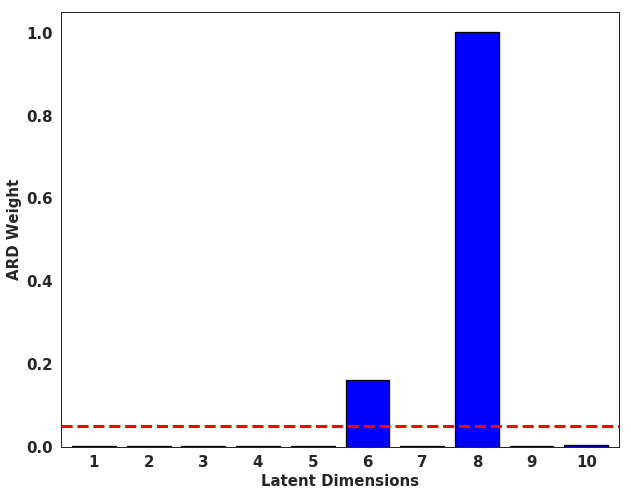

5 7


<Figure size 432x288 with 0 Axes>

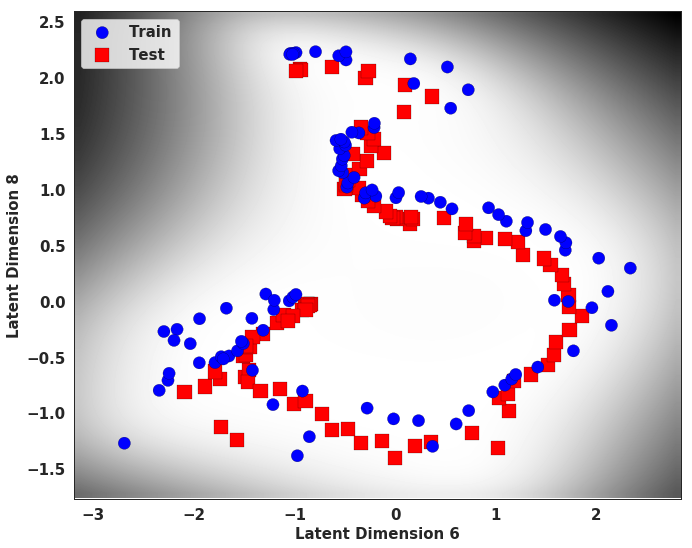

3, pca: 0.081248, 0.058702


<Figure size 432x288 with 0 Axes>

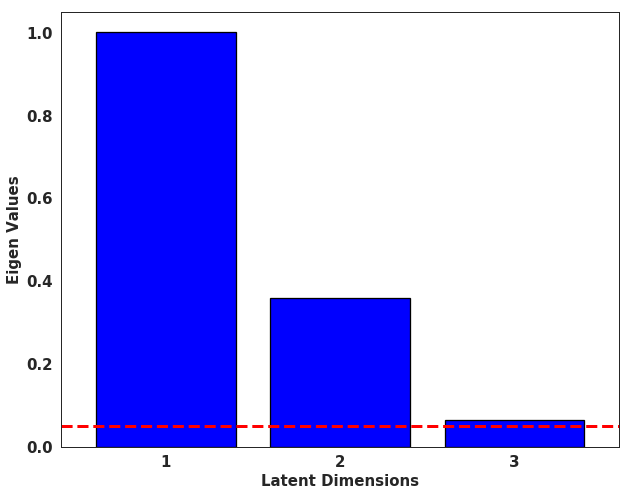

0 1


<Figure size 432x288 with 0 Axes>

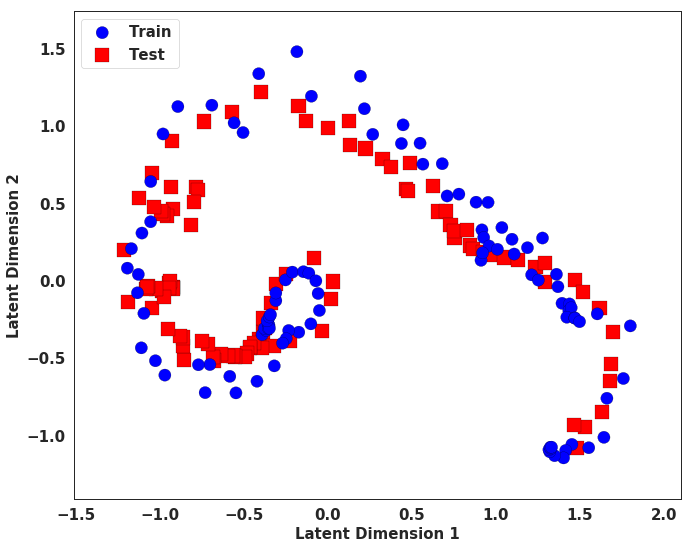

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    00s13  002  -1.693187e+04   9.272092e+04 
    03s23  048  -1.879550e+04   2.536774e+02 
    06s57  102  -1.893382e+04   5.144088e+00 
Runtime:     06s57
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s16  0003   2.001816e+06   3.220952e+12 
    02s20  0040  -3.115079e+04   1.361763e+04 
    07s34  0153  -3.256792e+04   1.060589e+04 
    22s68  0485  -3.392126e+04   9.905264e+03 
    45s97  1002  -3.469684e+04   1.371524e+04 
Runtime:     45s97
Optimization status: Maximum number of f evaluations reached

....................................................................................................
....................................................................................................
3, gplvm: 0.134244, 0.094089


<Figure size 432x288 with 0 Axes>

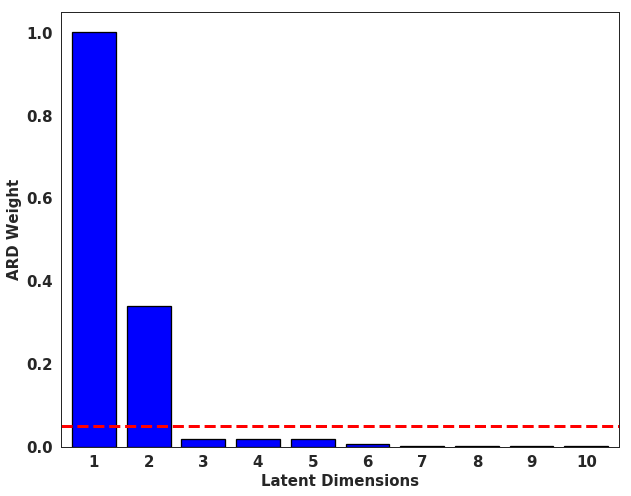

1 0


<Figure size 432x288 with 0 Axes>

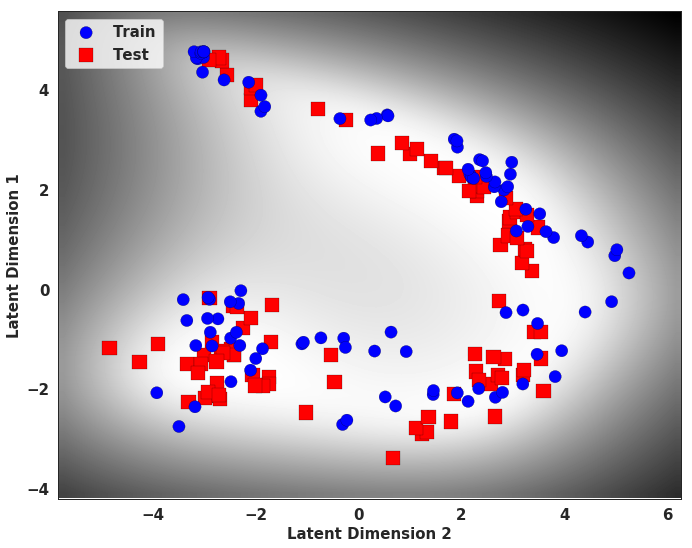

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    00s12  001   9.279859e+05   2.695731e+10 
    01s12  010   1.064513e+04   6.876129e+05 
    03s23  025  -8.509591e+03   1.582272e+04 
    10s63  090  -1.274782e+04   2.384915e+03 
    12s19  102  -1.280762e+04   7.897060e+02 
Runtime:     12s19
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s16  0001  -1.280762e+04   9.692663e+06 
    03s42  0027  -1.525972e+04   1.080412e+04 
    10s88  0096  -1.660231e+04   1.830940e+04 
    34s09  0291  -1.783273e+04   6.500640e+03 
 01m39s00  0833  -1.823818e+04   1.252359e+03 
 01m57s55  1002  -1.825608e+04   2.143734e+02 
Runtime:  01m57s55
Optimization status: Maximum number of f evaluations reached

....................................................................................................
..........................................

<Figure size 432x288 with 0 Axes>

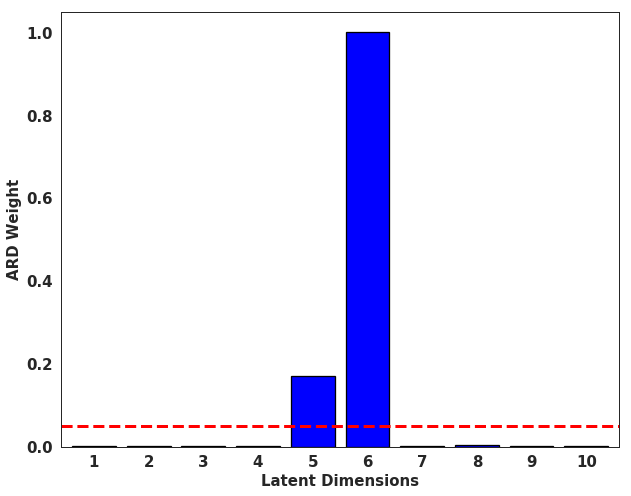

4 5


<Figure size 432x288 with 0 Axes>

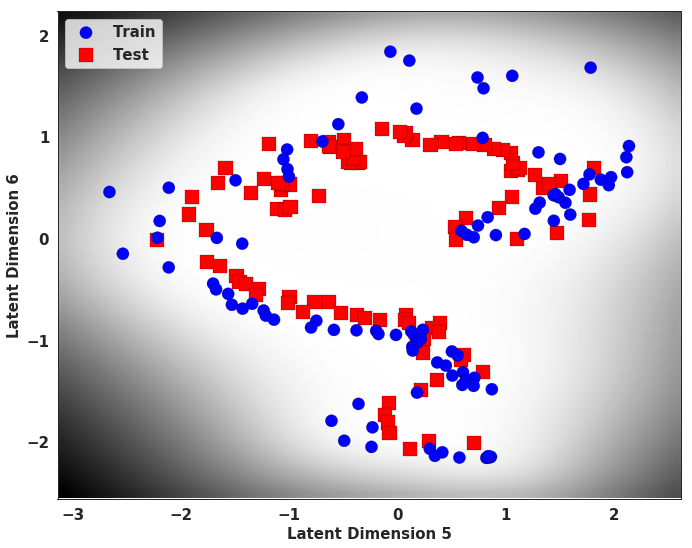

4, pca: 0.078111, 0.071256


<Figure size 432x288 with 0 Axes>

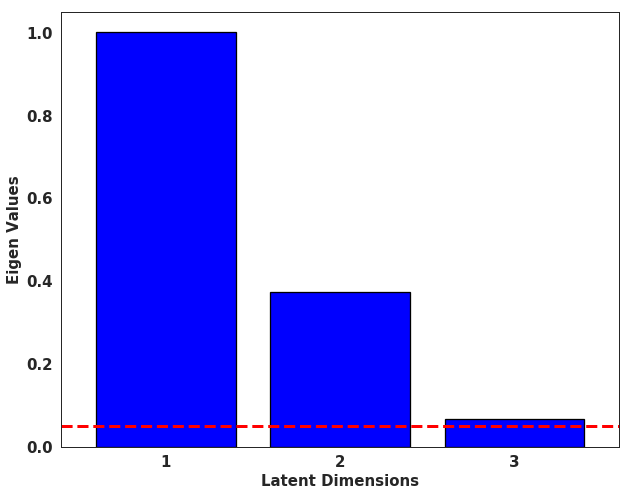

0 1


<Figure size 432x288 with 0 Axes>

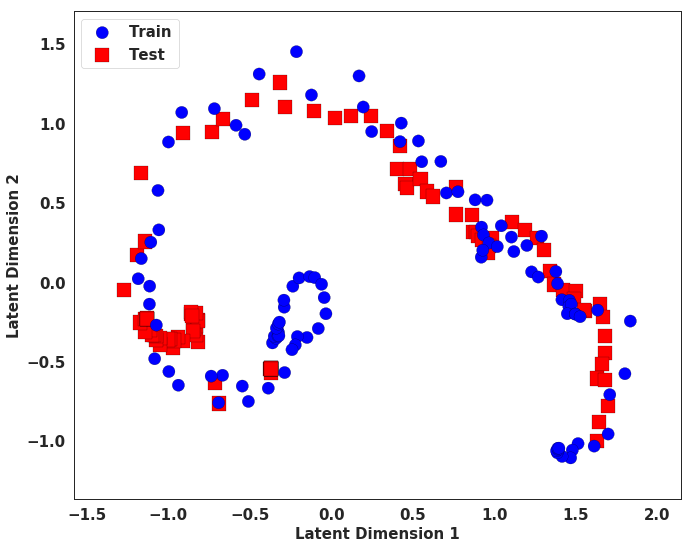

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    00s15  003  -1.724869e+04   3.047875e+04 
    03s23  063  -1.890936e+04   3.193403e+01 
    05s18  102  -1.893212e+04   3.884828e+00 
Runtime:     05s18
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s18  0004  -2.992607e+04   2.995965e+06 
    02s21  0045  -3.128676e+04   2.205311e+04 
    08s35  0176  -3.287619e+04   2.542569e+04 
    27s02  0531  -3.390552e+04   1.222312e+04 
    49s34  1002  -3.444308e+04   1.412934e+04 
Runtime:     49s34
Optimization status: Maximum number of f evaluations reached

....................................................................................................
....................................................................................................
4, gplvm: 0.107866, 0.095763


<Figure size 432x288 with 0 Axes>

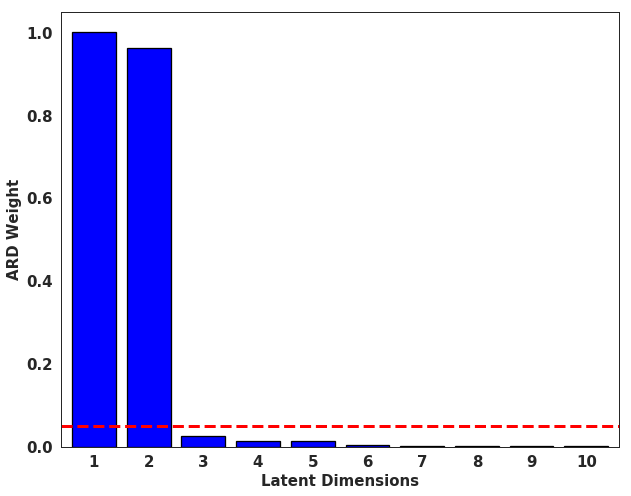

1 0


<Figure size 432x288 with 0 Axes>

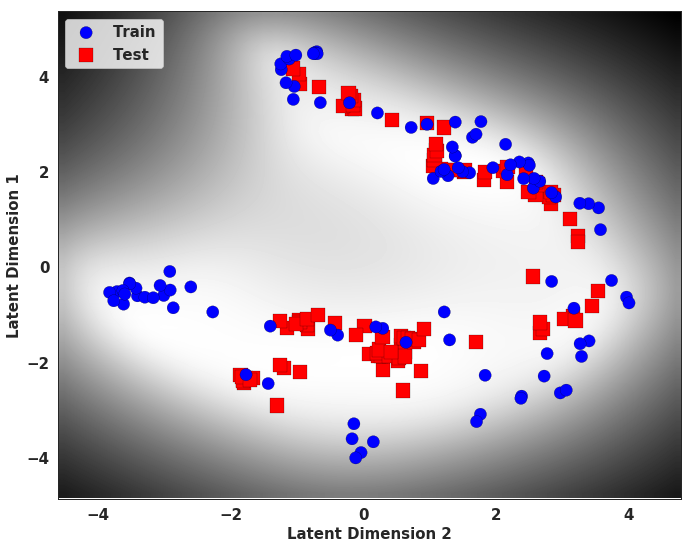

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    02s25  016  -3.246926e+03   3.781571e+04 
    03s27  022  -6.886883e+03   2.070916e+04 
    10s80  078  -1.250970e+04   1.163563e+03 
    14s10  102  -1.275224e+04   7.220920e+02 
Runtime:     14s10
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s13  0001  -1.275224e+04   9.670622e+06 
    03s31  0025  -1.518030e+04   1.094277e+04 
    10s82  0082  -1.632962e+04   1.260141e+04 
    31s28  0253  -1.775607e+04   1.278964e+04 
 01m28s89  0724  -1.826879e+04   4.941544e+02 
 02m03s06  1002  -1.831497e+04   1.668861e+02 
Runtime:  02m03s06
Optimization status: Maximum number of f evaluations reached

....................................................................................................
........................................................................................

<Figure size 432x288 with 0 Axes>

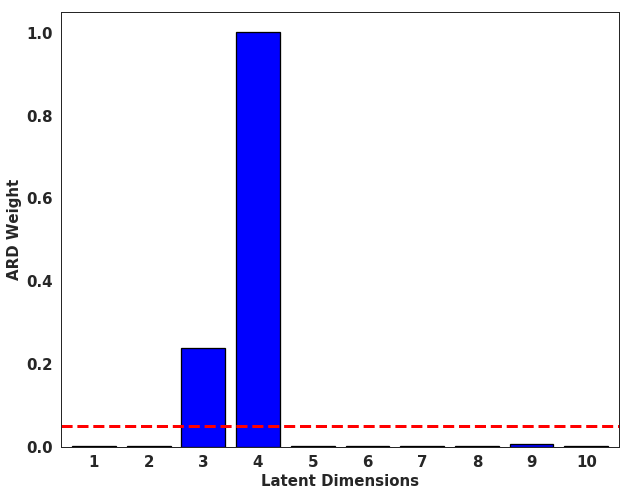

2 3


<Figure size 432x288 with 0 Axes>

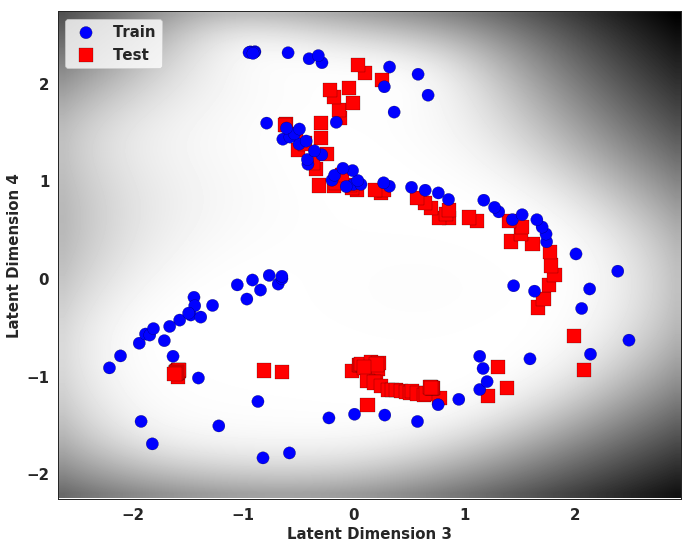

5, pca: 0.077321, 0.068087


<Figure size 432x288 with 0 Axes>

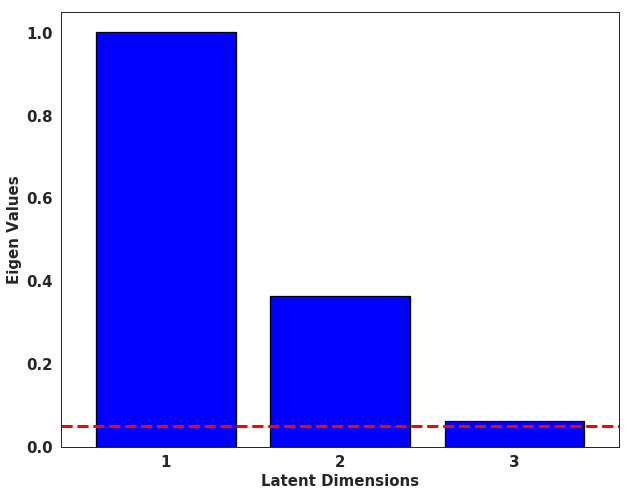

0 1


<Figure size 432x288 with 0 Axes>

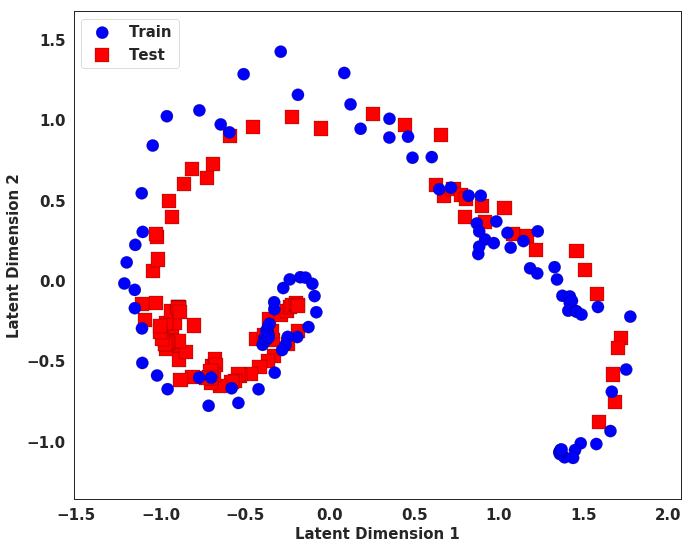

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    00s15  003  -1.727388e+04   2.979626e+04 
    02s17  048  -1.866870e+04   1.382253e+02 
    04s65  102  -1.883857e+04   2.919524e+01 
Runtime:     04s65
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s05  0001  -1.883857e+04   2.954488e+07 
    00s15  0003  -1.192994e+04   7.329907e+08 
    03s23  0064  -3.226849e+04   1.633424e+04 
    10s34  0223  -3.336954e+04   1.932522e+04 
    29s82  0669  -3.459612e+04   1.187221e+04 
    45s26  1003  -3.511441e+04   3.312809e+04 
Runtime:     45s26
Optimization status: Maximum number of f evaluations reached

....................................................................................................
....................................................................................................
5, gplvm: 0.104636, 0.098858


<Figure size 432x288 with 0 Axes>

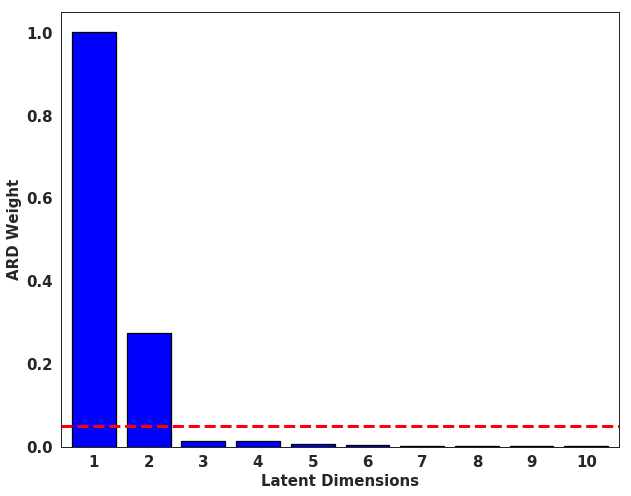

1 0


<Figure size 432x288 with 0 Axes>

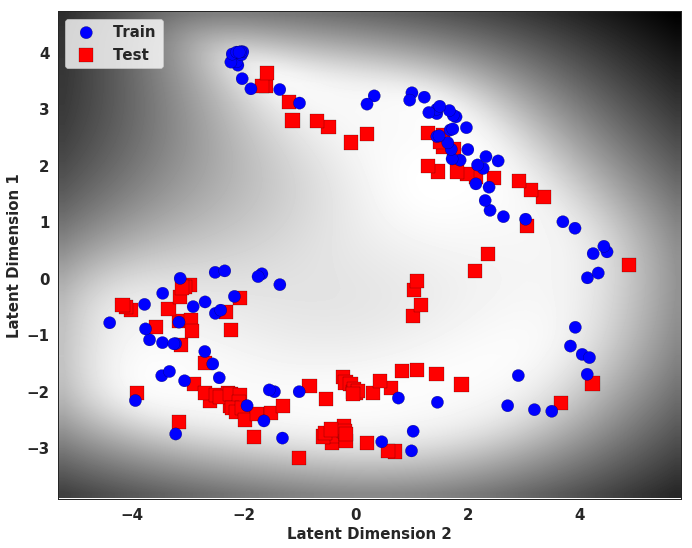

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    00s11  001   9.138970e+05   2.419880e+10 
    01s11  008   2.173606e+04   2.632984e+06 
    03s25  024  -8.072674e+03   1.946129e+04 
    09s76  079  -1.280421e+04   1.720809e+03 
    12s41  102  -1.291533e+04   3.138054e+02 
Runtime:     12s41
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s11  0001  -1.291533e+04   1.025889e+07 
    02s18  0024  -1.546215e+04   2.257303e+04 
    09s66  0092  -1.685352e+04   8.583048e+04 
    34s61  0278  -1.826421e+04   5.050808e+03 
 01m37s26  0789  -1.856021e+04   6.423843e+02 
 02m04s02  1002  -1.859718e+04   5.540755e+02 
Runtime:  02m04s02
Optimization status: Maximum number of f evaluations reached

....................................................................................................
..........................................

<Figure size 432x288 with 0 Axes>

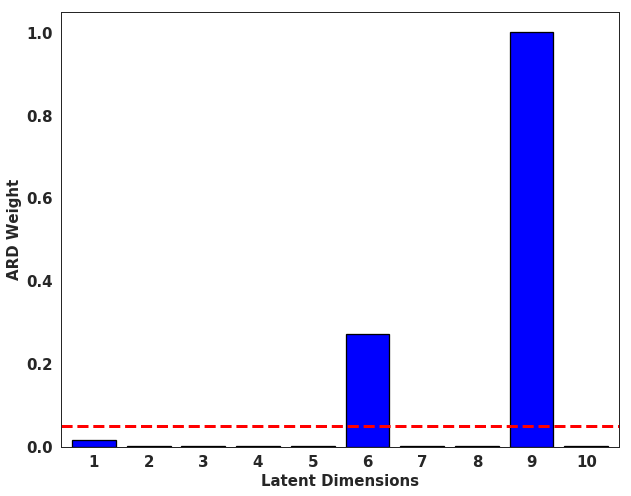

5 8


<Figure size 432x288 with 0 Axes>

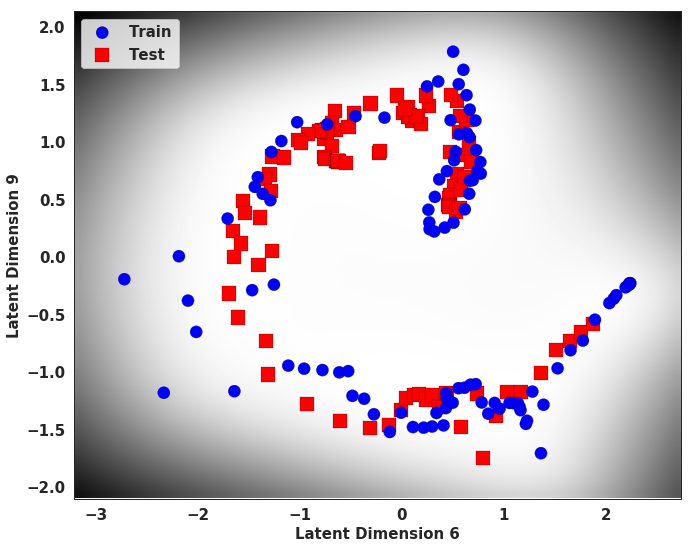

6, pca: 0.077979, 0.058978


<Figure size 432x288 with 0 Axes>

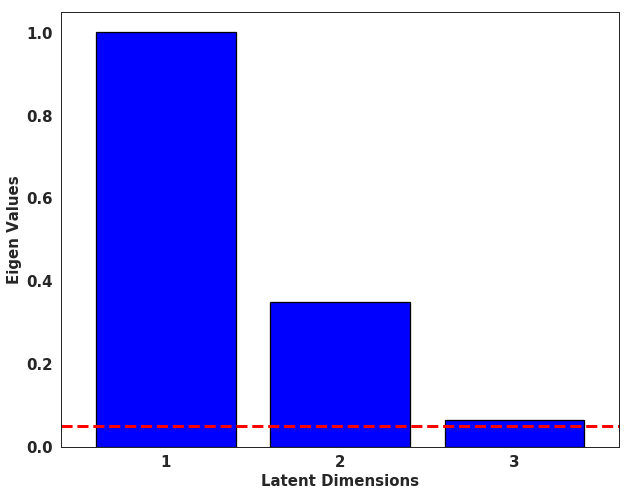

0 1


<Figure size 432x288 with 0 Axes>

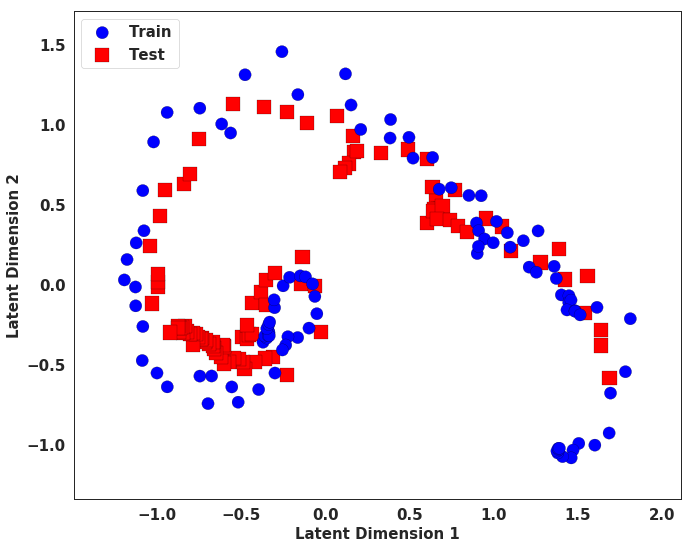

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    00s00  000  -1.644970e+04           nan 
    02s10  028  -1.851544e+04   3.212274e+03 
    05s89  102  -1.888465e+04   9.098642e+00 
Runtime:     05s89
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s15  0003   1.602003e+06   2.142220e+12 
    03s23  0068  -3.184059e+04   5.831357e+04 
    11s46  0247  -3.356799e+04   1.757580e+04 
    36s05  0725  -3.473487e+04   6.113777e+03 
    49s92  1002  -3.504337e+04   6.998344e+03 
Runtime:     49s92
Optimization status: Maximum number of f evaluations reached

....................................................................................................
....................................................................................................
6, gplvm: 0.107128, 0.083161


<Figure size 432x288 with 0 Axes>

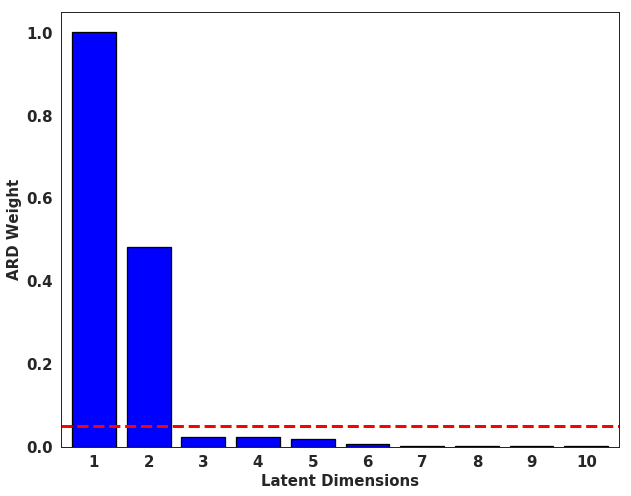

1 0


<Figure size 432x288 with 0 Axes>

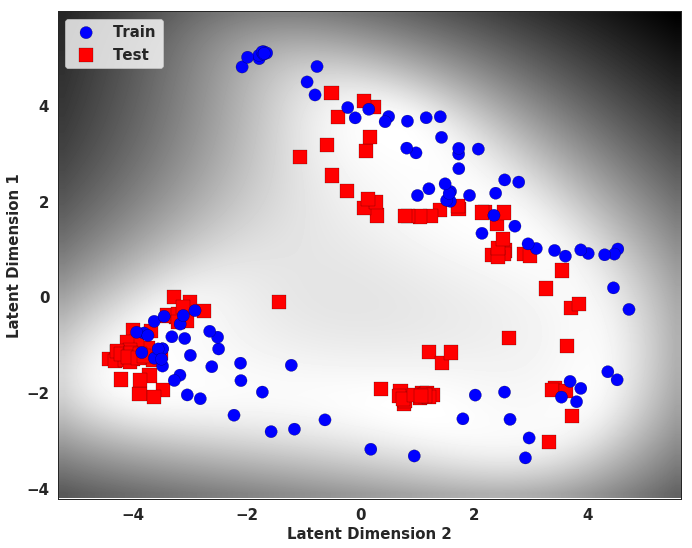

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i     f              |g|        
    01s18  010   1.272996e+04   9.232657e+05 
    03s31  026  -7.208421e+03   1.636057e+04 
    09s71  081  -1.248672e+04   2.938793e+03 
    12s37  102  -1.268004e+04   5.482908e+02 
Runtime:     12s37
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s10  0001  -1.268004e+04   1.013872e+07 
    02s34  0019  -1.506887e+04   2.533215e+04 
    08s62  0074  -1.620280e+04   2.774634e+04 
    27s93  0227  -1.770413e+04   1.482994e+04 
 01m19s29  0652  -1.820863e+04   7.140762e+02 
 01m59s42  1002  -1.826401e+04   2.296992e+02 
Runtime:  01m59s42
Optimization status: Maximum number of f evaluations reached

....................................................................................................
........................................................................................

<Figure size 432x288 with 0 Axes>

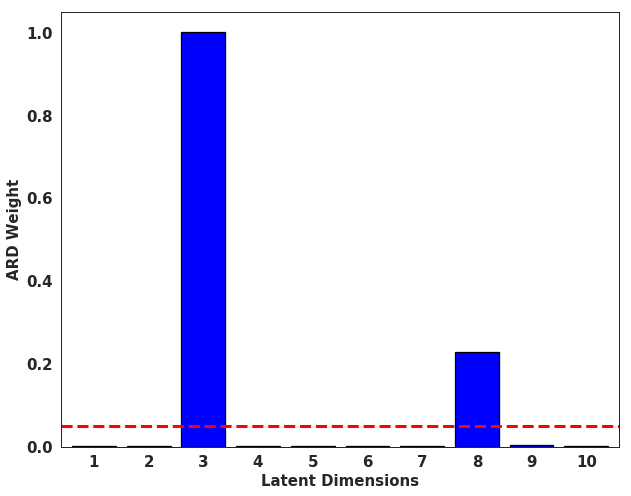

7 2


<Figure size 432x288 with 0 Axes>

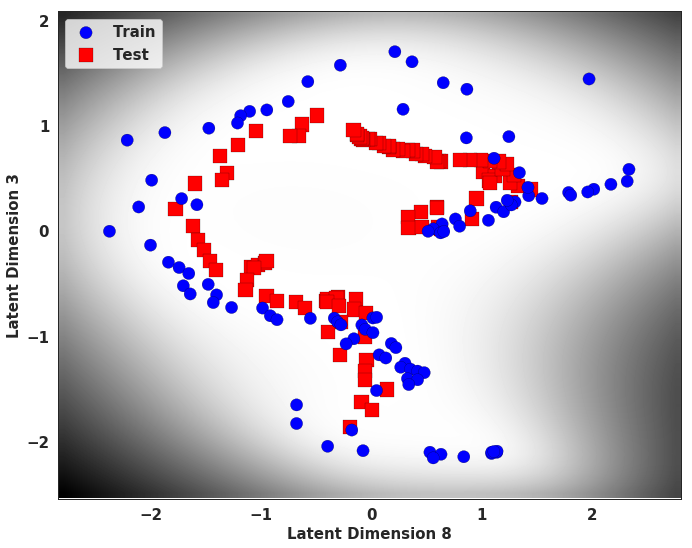

<Figure size 432x288 with 0 Axes>

In [20]:
# Leave-one out cross validation for both datasets
nDims = [12,24]
features = ['JA', 'JD']
datasets = {'JA': JAData, 'JD': JDData}

for feature, nDim in zip(features, nDims):
    # start the loop
    print(feature, nDim)

    # variable initialization
    nPostures = 6
    nSamples = 100

    # variables for model training
    fixDim = 3
    minDim = 3
    initDim = 10
    wThresh = 0.05
    initIter = 100
    trainIter = 1000
    numInducing = 50
    lvms = ['pca', 'gplvm', 'bgplvm']

    # dicts to store results
    expData = {}
    expModels = {}
    expResults = {}

    # loop over postures
    for posture in range(1,nPostures+1):
        expModels[posture] = {}
        expResults[posture] = {}
        
        # setup the training and test indices
        tsInds = [posture]
        trInds = list(range(1,nPostures+1))
        del trInds[posture-1]
        trData = np.empty((0,nDim))
        tsData = np.empty((0,nDim))

        # training and test data
        for trInd in trInds:
            trData = np.vstack((trData,datasets[feature][trInd][:,1:]))
        for tsInd in tsInds:
            tsData = np.vstack((tsData,datasets[feature][tsInd][:,1:]))

        # np.random.shuffle(trData)
        # np.random.shuffle(tsData)
    
        expData[posture] = {'train': trData, 'test': tsData}

        # loop over latent variable models
        for lvm in lvms:  
            expName = '%s%d' % (lvm, posture)
                
            if lvm == 'pca':
                plotIndices = [0,1]
                model = pcaModel(trData, expName, qDim=fixDim)
                results = pcaError(model, trData[:nSamples,:], tsData)
            elif lvm == 'gplvm':
                plotIndices = None
                model = gplvmModel(trData, expName, qDim=initDim, initIters=initIter, 
                                   trainIters=trainIter, init='pca')
                results = gplvmError(model, trData[:nSamples,:], tsData, 
                                     wThresh=wThresh, minDim=minDim)
            elif lvm == 'bgplvm':
                plotIndices = None
                model = bgplvmModel(trData, expName, qDim=initDim, nInducing=numInducing, 
                                    initIters=initIter, trainIters=trainIter, init='rand')
                results = bgplvmError(model, trData[:nSamples,:], tsData, 
                                      wThresh=wThresh, minDim=minDim)
        
            expModels[posture][lvm] = model
            expResults[posture][lvm] = results
            print('%d, %s: %f, %f' % (posture, lvm, results[4].mean(), results[5].mean()))

            ax = plotScales(model, lvm=lvm)
            plt.savefig('Results/%s/Images/%d%sScales.png' % (feature, posture, lvm))
            ax = plotLatent(model, results[0], results[1], lvm=lvm, plotIndices=plotIndices)
            plt.savefig('Results/%s/Images/%d%sSpace.png' % (feature, posture, lvm))
    
    pickle.dump(expData, open('Dataset/CrossVal%s.p' % (feature),'wb'))
    pickle.dump(expModels, open('Models/CrossVal%s.p' % (feature),'wb'))
    pickle.dump(expResults, open('Results/CrossVal%s.p' % (feature),'wb'))

## Reconstruction Error and Statistical Significance
---

In [21]:
def metricEvaluation(keys, data, pred):
    nDim = data[keys[0]].shape[1]
    
    err = {}
    nErr = {}
    corr = {}
    for key in keys:
        err[key] = np.sqrt(metrics.mean_squared_error(data[key],pred[key],multioutput='raw_values'))
        nErr[key] = np.divide(np.sqrt(metrics.mean_squared_error(data[key],pred[key],multioutput='raw_values')), 
                              data[key].max(axis=0) - data[key].min(axis=0))
        corr[key] = np.zeros((1,nDim))
        for d in range(nDim):
            corr[key][0,d],_ = stats.pearsonr(data[key][:,d],pred[key][:,d])
    
    return err, nErr, corr

In [34]:
nPostures = 6
nSamples = 100
features = ['JA', 'JD']
dTypes = ['train', 'test']
params = ['rmse','nrmse','corr']
lvms = ['pca', 'gplvm', 'bgplvm']

for feature in features:
    # metric results dictionary initialization
    metricResults = {}
    for dType in dTypes:
        metricResults[dType] = {}
        for lvm in lvms:
            metricResults[dType][lvm] = {}
            for param in params:
                metricResults[dType][lvm][param] = []

    # load the inference results and ground truth data
    expData = pickle.load(open('Dataset/CrossVal%s.p' % (feature),'rb'))
    expResults = pickle.load(open('Results/CrossVal%s.p' % (feature),'rb'))

    # loop over dataset to get metrics
    for posture in range(1,nPostures+1):
        data = {}
        pred = {}
        for lvm in lvms:        
            # obtain the train, test data
            data['train'] = expData[posture]['train'][:nSamples,:]
            pred['train'] = expResults[posture][lvm][2]
            
            data['test'] = expData[posture]['test']
            pred['test'] = expResults[posture][lvm][3]
                        
            err, nErr, corr = metricEvaluation(dTypes,data,pred)
            for dType in dTypes:
                metricResults[dType][lvm]['rmse'].append(err[dType].mean())
                metricResults[dType][lvm]['corr'].append(corr[dType].mean())
                metricResults[dType][lvm]['nrmse'].append(nErr[dType].mean())

    # main results used in the paper table 1
    print('Main results used in IROS LBR Paper, Table 1')
    
    # convert lists to numpy arrays
    for dType in dTypes:
        for lvm in lvms:
            for param in params:
                metricResults[dType][lvm][param] = np.asarray(metricResults[dType][lvm][param])
                if param == 'nrmse' and dType == 'test':
                    print(feature,lvm,np.mean(metricResults[dType][lvm][param]))

    # save the experimental results
    pickle.dump(metricResults, open('Results/metricResults%s.p' % (feature),'wb'))            

Main results used in IROS LBR Paper, Table 1
JA pca 0.040398499648220794
JA gplvm 0.054134408044755646
JA bgplvm 0.03366782262682891
Main results used in IROS LBR Paper, Table 1
JD pca 0.09507767409024571
JD gplvm 0.12882319481005047
JD bgplvm 0.0824942767377739


In [23]:
# variables for statistical significance
features = ['JA', 'JD']
dTypes = ['train', 'test']
params = ['rmse','nrmse','corr']
lvms = ['pca', 'gplvm', 'bgplvm']

for feature in features:
    statResults = {}
    metricResults = pickle.load(open('Results/metricResults%s.p' % (feature),'rb'))

    # loop over the dataset and get p-values for one-sided tests
    for dType in dTypes:
        statResults[dType] = {}
        for lvmList in itertools.combinations(lvms,2):
            lvmKey = lvmList[0][0]+lvmList[1][0]
            statResults[dType][lvmKey] = {}
            for param in params:
                l0 = metricResults[dType][lvmList[0]][param]
                l1 = metricResults[dType][lvmList[1]][param]
                _, pval = stats.wilcoxon(l0, l1)
                statResults[dType][lvmKey][param] = pval/2

    print(statResults['test'])
    pickle.dump(statResults, open('Results/statResults%s.p' % (feature),'wb'))

{'pg': {'rmse': 0.013853924679039932, 'nrmse': 0.013853924679039932, 'corr': 0.013853924679039932}, 'pb': {'rmse': 0.057925748762965044, 'nrmse': 0.057925748762965044, 'corr': 0.023199730935452297}, 'gb': {'rmse': 0.013853924679039932, 'nrmse': 0.013853924679039932, 'corr': 0.013853924679039932}}
{'pg': {'rmse': 0.013853924679039932, 'nrmse': 0.013853924679039932, 'corr': 0.013853924679039932}, 'pb': {'rmse': 0.013853924679039932, 'nrmse': 0.013853924679039932, 'corr': 0.013853924679039932}, 'gb': {'rmse': 0.013853924679039932, 'nrmse': 0.013853924679039932, 'corr': 0.013853924679039932}}


 /home/dl-box/miniconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning:Warning: sample size too small for normal approximation.


In [29]:
# data frame to store datasets
nTypes = 2
nParams = 3
nModels = 3
nTrials = nPostures

dTypes = ['train','test']
dNames = ['Train','Test']
params = ['rmse','nrmse','corr']
pNames = ['RMSE','NRMSE','Corr']
models = ['gplvm','pca','bgplvm']
mNames = ['GPLVM','PCA','BGPLVM']
columns = ['Value','Type','Model','Param']

dataFrames = {}

# loop over the feature representations
for feature in features:
    dataFrames[feature] = pd.DataFrame(columns=columns)
    metricResults = pickle.load(open('Results/metricResults%s.p' % (feature), 'rb'))
    for dType,dName in zip(dTypes,dNames):
        for model,mName in zip(models, mNames):
            for param, pName in zip(params, pNames):
                dat = np.atleast_2d(metricResults[dType][model][param])
                dat = np.concatenate((dat,np.atleast_2d([dName]*nTrials)),axis=0)
                dat = np.concatenate((dat,np.atleast_2d([mName]*nTrials)),axis=0)
                dat = np.concatenate((dat,np.atleast_2d([pName]*nTrials)),axis=0)
                dF = pd.DataFrame(dat.transpose(),columns=columns)
                dataFrames[feature] = dataFrames[feature].append(dF)
    dataFrames[feature].index = range(nTypes*nModels*nParams*nTrials)
    dataFrames[feature]['Value'] = dataFrames[feature]['Value'].apply(pd.to_numeric)

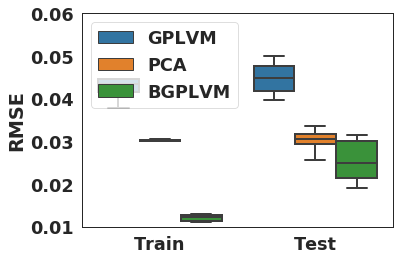

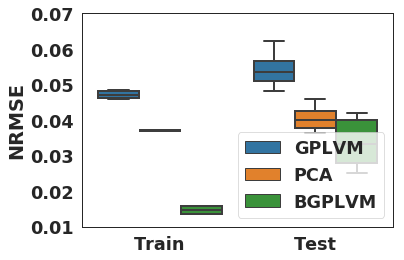

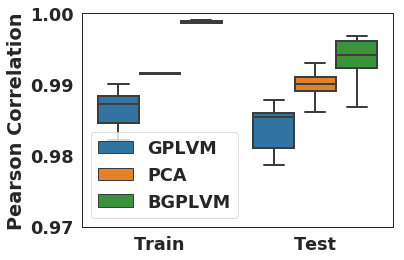

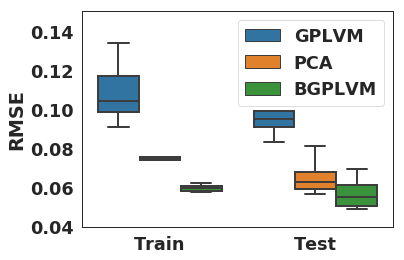

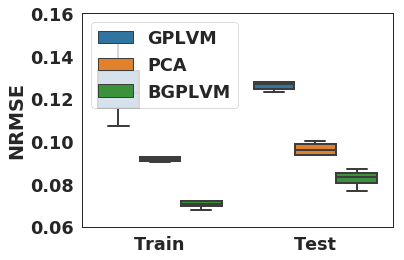

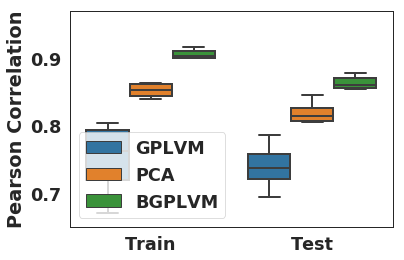

In [31]:
props = {'connectionstyle':'bar,fraction=0.125', 'arrowstyle':'-', 'lw':2}
limits = {'JA': np.asarray([[0.01,0.06],[0.01,0.07],[0.97,1.00]]),
          'JD': np.asarray([[0.04,0.15],[0.06,0.16],[0.65,0.97]])}

for feature in features:
    dataFrame = dataFrames[feature]
    
    dF = dataFrame[dataFrame['Param'] == 'RMSE']
    fig = plt.figure()
    ax = sns.boxplot(x='Type', y='Value', hue='Model', data=dF, notch=False, fliersize=0)
    ax.set_xlabel('')
    ax.set_ylabel('RMSE',fontweight='bold')
    ax.legend_.set_title('')
    ax.set_ylim(limits[feature][0])
    plt.tight_layout()
    plt.savefig('Results/%s/rmse.pdf' % (feature), format='pdf')

    dF = dataFrame[dataFrame['Param'] == 'NRMSE']
    fig = plt.figure()
    ax = sns.boxplot(x='Type', y='Value', hue='Model', data=dF, notch=False, fliersize=0)
    ax.set_xlabel('')
    ax.set_ylabel('NRMSE',fontweight='bold')
    ax.set_ylim(limits[feature][1])
    ax.legend_.set_title('')
    plt.tight_layout()
    plt.savefig('Results/%s/nrmse.pdf' % (feature), format='pdf')

    dF = dataFrame[dataFrame['Param'] == 'Corr']
    fig = plt.figure()
    ax = sns.boxplot(x='Type', y='Value', hue='Model', data=dF, notch=False, fliersize=0)
    ax.set_xlabel('')
    ax.legend_.set_title('')
    ax.set_ylim(limits[feature][2])
    ax.set_ylabel('Pearson Correlation',fontweight='bold')
    plt.tight_layout()
    plt.savefig('Results/%s/corr.pdf' % (feature), format='pdf')